<a href="https://colab.research.google.com/github/springboardmentor2468a-lab/AgriYield/blob/TAMILARASAN/Agri_Yield_Predictor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**AgriYield Predictor: Forecasting Crop Yield Using Environmental and Soil Data**

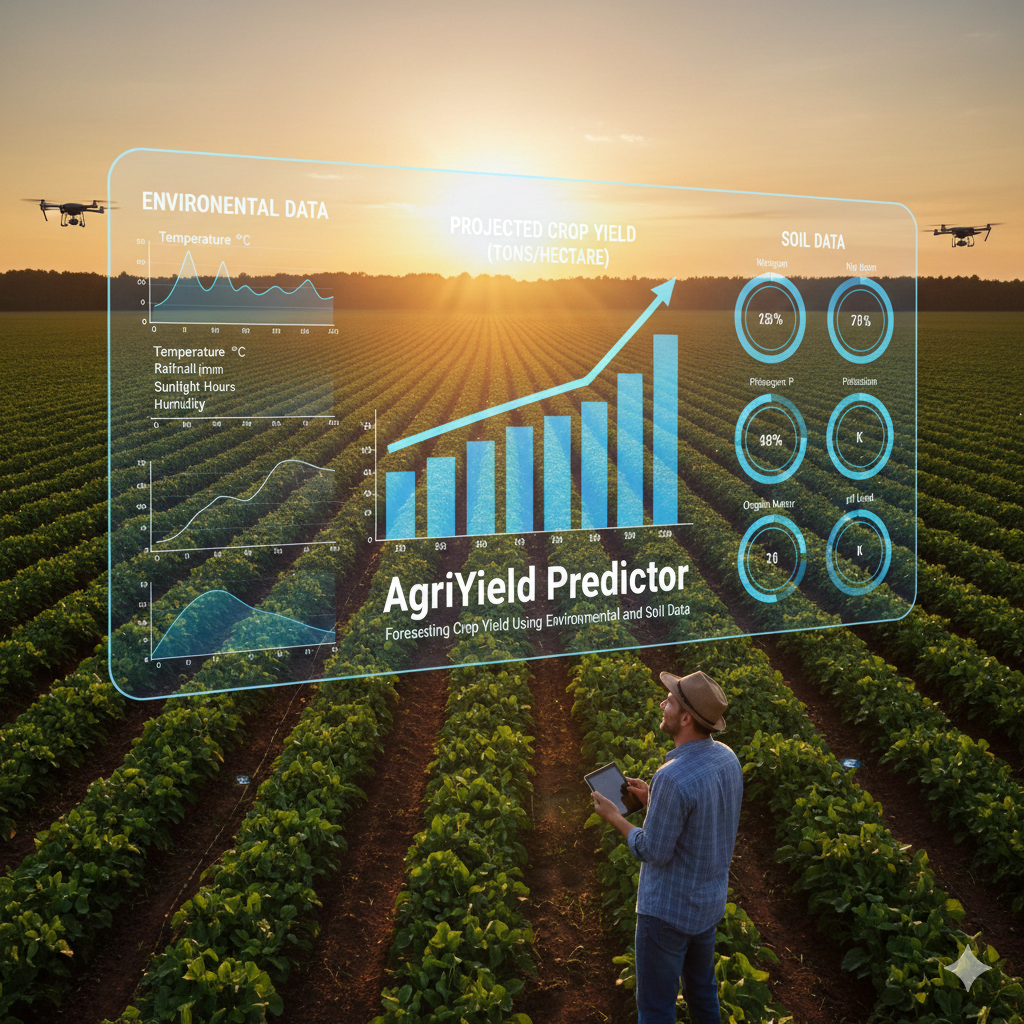

#**Milestone 1: Week 1 & 2 — Requirements & Dataset Preparation**

# **Project Overview & Scope**

**Project Objective**

Develop a machine learning model that can accurately predict crop yield (kg/hectare) for different crops grown in various regions, based on soil and environmental data.

**Project Scope**

This project will include:


| Task                       | Includes                                     | Tools Used          |
| -------------------------- | -------------------------------------------- | ------------------- |
| Data Collection & Cleaning | Integrating soil, crop, and climate datasets | Python (Pandas)     |
| EDA & Feature Engineering  | Trends, correlations, engineered features    | Matplotlib, Seaborn |
| Model Training             | Regression models                            | Sklearn, XGBoost    |
| Performance Evaluation     | RMSE, MAE, R² score                          | Sklearn metrics     |
| Deployment                 | Simple UI for farmers                        | Streamlit / Flask   |


####**Architectural diagram**

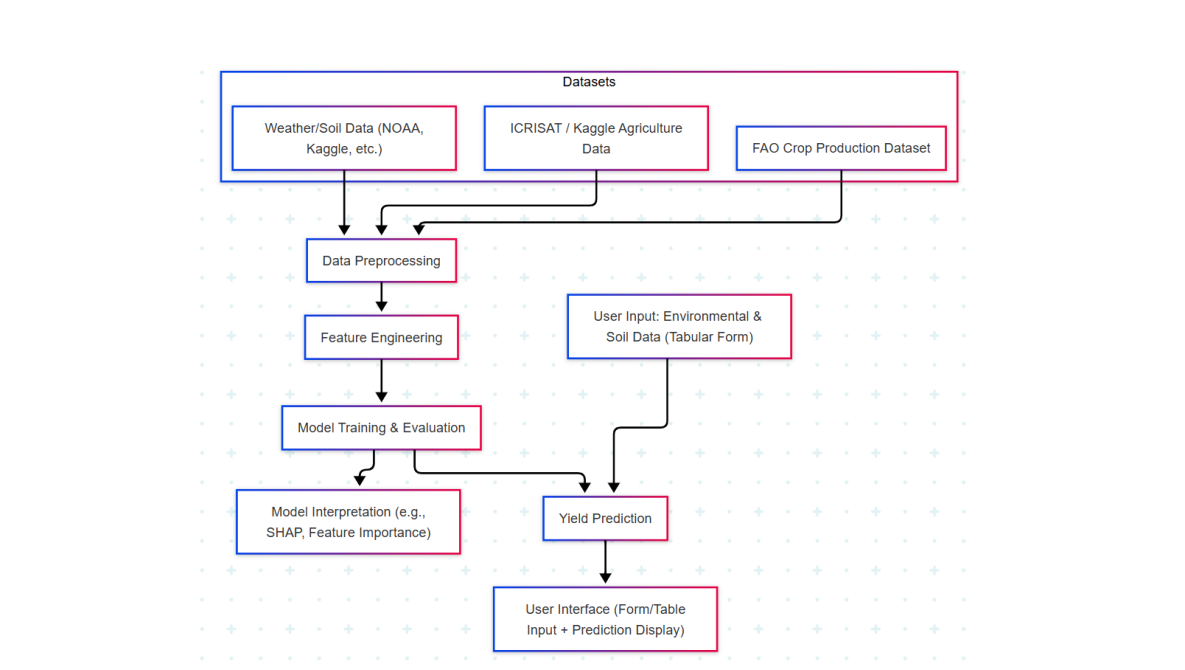

#**Import Required Libraries**


In [964]:
import numpy as np            # For numerical operations
import pandas as pd           # For data loading & preprocessing
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns            # For statistical visualizations

from sklearn.model_selection import train_test_split

#**Load Raw Datasets**

In [965]:
# Load the first dataset (FAOSTAT data)
fao = pd.read_csv("DF_1_FAOSTAT_data_en_11-19-2025.csv")

In [966]:
# Load the second dataset (Crop Recommendation data)
crop = pd.read_csv("DF_2_Crop_recommendation.csv")

In [967]:
print("FAOSTAT shape:", fao.shape)
print("Crop Recommendation shape:", crop.shape)

FAOSTAT shape: (5940, 15)
Crop Recommendation shape: (2200, 8)


In [855]:
fao


Domain Code                        Domain  Area Code (M49)   Area  \
0            QCL  Crops and livestock products              356  India   
1            QCL  Crops and livestock products              356  India   
2            QCL  Crops and livestock products              356  India   
3            QCL  Crops and livestock products              356  India   
4            QCL  Crops and livestock products              356  India   
...          ...                           ...              ...    ...   
5935         QCL  Crops and livestock products              356  India   
5936         QCL  Crops and livestock products              356  India   
5937         QCL  Crops and livestock products              356  India   
5938         QCL  Crops and livestock products              356  India   
5939         QCL  Crops and livestock products              356  India   

      Element Code         Element  Item Code (CPC)  \
0             5312  Area harvested           1654.0   
1             5412           Yield           1654.0   
2             5510      Production           1654.0   
3             5312  Area harvested           1654.0   
4             5412           Yield           1654.0   
...            ...             ...              ...   
5935          5412           Yield            111.0   
5936          5510      Production            111.0   
5937          5312  Area harvested            111.0   
5938          5412           Yield            111.0   
5939          5510      Production            111.0   

                                                   Item  Year Code  Year  \
0     Anise, badian, coriander, cumin, caraway, fenn...       2000  2000   
1     Anise, badian, coriander, cumin, caraway, fenn...       2000  2000   
2     Anise, badian, coriander, cumin, caraway, fenn...       2000  2000   
3     Anise, badian, coriander, cumin, caraway, fenn...       2001  2001   
4     Anise, badian, coriander, cumin, caraway, fenn...       2001  2001   
...                                                 ...        ...   ...   
5935                                              Wheat       2022  2022   
5936                                              Wheat       2022  2022   
5937                                              Wheat       2023  2023   
5938                                              Wheat       2023  2023   
5939                                              Wheat       2023  2023   

       Unit         Value Flag Flag Description Note  
0        ha  3.444340e+05    A  Official figure  NaN  
1     kg/ha  4.840000e+02    A  Official figure  NaN  
2         t  1.666920e+05    A  Official figure  NaN  
3        ha  5.692710e+05    A  Official figure  NaN  
4     kg/ha  4.303000e+02    A  Official figure  NaN  
...     ...           ...  ...              ...  ...  
5935  kg/ha  3.537300e+03    A  Official figure  NaN  
5936      t  1.077421e+08    A  Official figure  NaN  
5937     ha  3.140072e+07    A  Official figure  NaN  
5938  kg/ha  3.520700e+03    A  Official figure  NaN  
5939      t  1.105537e+08    A  Official figure  NaN  

[5940 rows x 15 columns]

In [856]:
crop



N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]

In [857]:
fao['Item'].unique()[:40]

array(['Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw',
       'Apples', 'Apricots', 'Areca nuts', 'Bananas', 'Barley',
       'Beans, dry', 'Cabbages', 'Cantaloupes and other melons',
       'Carrots and turnips', 'Cashew nuts, in shell', 'Cassava, fresh',
       'Castor oil seeds', 'Cauliflowers and broccoli', 'Cherries',
       'Chick peas, dry',
       'Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw',
       'Chillies and peppers, green (Capsicum spp. and Pimenta spp.)',
       'Cocoa beans', 'Coconuts, in shell', 'Coffee, green', 'Coir, raw',
       'Cucumbers and gherkins', 'Eggplants (aubergines)', 'Figs',
       'Ginger, raw', 'Grapes', 'Green garlic',
       'Groundnuts, excluding shelled', 'Jute, raw or retted',
       'Kenaf, and other textile bast fibres, raw or retted',
       'Lemons and limes', 'Lentils, dry', 'Lettuce and chicory',
       'Linseed', 'Maize (corn)', 'Mangoes, guavas and mangosteens',
       'Millet', 'Mushrooms a

In [858]:
for i in fao['Item'].unique():
    print(i)

Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw
Apples
Apricots
Areca nuts
Bananas
Barley
Beans, dry
Cabbages
Cantaloupes and other melons
Carrots and turnips
Cashew nuts, in shell
Cassava, fresh
Castor oil seeds
Cauliflowers and broccoli
Cherries
Chick peas, dry
Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw
Chillies and peppers, green (Capsicum spp. and Pimenta spp.)
Cocoa beans
Coconuts, in shell
Coffee, green
Coir, raw
Cucumbers and gherkins
Eggplants (aubergines)
Figs
Ginger, raw
Grapes
Green garlic
Groundnuts, excluding shelled
Jute, raw or retted
Kenaf, and other textile bast fibres, raw or retted
Lemons and limes
Lentils, dry
Lettuce and chicory
Linseed
Maize (corn)
Mangoes, guavas and mangosteens
Millet
Mushrooms and truffles
Natural rubber in primary forms
Nutmeg, mace, cardamoms, raw
Okra
Onions and shallots, dry (excluding dehydrated)
Oranges
Other beans, green
Other berries and fruits of the genus vaccinium n.e.c.
Other citrus fruit,

In [859]:
print(crop.columns)

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [860]:
crop = crop.rename(columns={'Item':'label'})

In [861]:
fao['Item'] = fao['Item'].str.split(r",|and")
fao = fao.explode('Item')

In [862]:
fao

Domain Code                        Domain  Area Code (M49)   Area  \
0            QCL  Crops and livestock products              356  India   
0            QCL  Crops and livestock products              356  India   
0            QCL  Crops and livestock products              356  India   
0            QCL  Crops and livestock products              356  India   
0            QCL  Crops and livestock products              356  India   
...          ...                           ...              ...    ...   
5935         QCL  Crops and livestock products              356  India   
5936         QCL  Crops and livestock products              356  India   
5937         QCL  Crops and livestock products              356  India   
5938         QCL  Crops and livestock products              356  India   
5939         QCL  Crops and livestock products              356  India   

      Element Code         Element  Item Code (CPC)     Item  Year Code  Year  \
0             5312  Area harvested           1654.0    Anise       2000  2000   
0             5312  Area harvested           1654.0   badian       2000  2000   
0             5312  Area harvested           1654.0     cori       2000  2000   
0             5312  Area harvested           1654.0       er       2000  2000   
0             5312  Area harvested           1654.0    cumin       2000  2000   
...            ...             ...              ...      ...        ...   ...   
5935          5412           Yield            111.0    Wheat       2022  2022   
5936          5510      Production            111.0    Wheat       2022  2022   
5937          5312  Area harvested            111.0    Wheat       2023  2023   
5938          5412           Yield            111.0    Wheat       2023  2023   
5939          5510      Production            111.0    Wheat       2023  2023   

       Unit         Value Flag Flag Description Note  
0        ha  3.444340e+05    A  Official figure  NaN  
0        ha  3.444340e+05    A  Official figure  NaN  
0        ha  3.444340e+05    A  Official figure  NaN  
0        ha  3.444340e+05    A  Official figure  NaN  
0        ha  3.444340e+05    A  Official figure  NaN  
...     ...           ...  ...              ...  ...  
5935  kg/ha  3.537300e+03    A  Official figure  NaN  
5936      t  1.077421e+08    A  Official figure  NaN  
5937     ha  3.140072e+07    A  Official figure  NaN  
5938  kg/ha  3.520700e+03    A  Official figure  NaN  
5939      t  1.105537e+08    A  Official figure  NaN  

[10652 rows x 15 columns]

# **CROP MAPPING**

In [863]:
#" other melons":"watermelon",

In [864]:
crop_mapping = {
    "Rice": "rice",
    "Maize (corn)": "maize",
    "Chick peas":"chickpea",
    "Pigeon peas":"pigeonpeas" ,
    "Beans":"mothbeans" ,
    "Lentils":"lentil" ,
    "Bananas":"banana" ,
    "Mangoes": "mango" ,
    "Grapes":"grapes" ,
    "Watermelons":"watermelon" ,
    "Cantaloupes ":"muskmelon",
    "Apples":"apple" ,
    "Oranges":"orange" ,
    "Papayas":"papaya" ,
    "Coconuts":"coconut" ,
    "Seed cotton":"cotton"  ,
    "Jute":"jute" ,
    "Coffee":"coffee"

}


In [865]:
len(crop_mapping)

18

In [866]:
df_final_agri['crop'].value_counts()

crop
Rice       2
Wheat      1
Corn       1
Soybean    1
Name: count, dtype: int64

In [867]:
len(crop_mapping)

18

In [868]:
fao['Crop']=fao['Item'].map(crop_mapping)

In [869]:
crop=crop.rename(columns={'label':'Crop'})

In [870]:
crop

N   P   K  temperature   humidity        ph    rainfall    Crop
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]

In [871]:
df_merged = crop.merge(
    fao,
    left_on="Crop",
    right_on="Crop",
    how="inner"
)

In [872]:
df_merged

N   P   K  temperature   humidity        ph    rainfall    Crop  \
0        90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
1        90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
2        90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
3        90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
4        90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
...     ...  ..  ..          ...        ...       ...         ...     ...   
129595  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   
129596  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   
129597  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   
129598  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   
129599  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   

       Domain Code                        Domain  ...         Element  \
0              QCL  Crops and livestock products  ...  Area harvested   
1              QCL  Crops and livestock products  ...           Yield   
2              QCL  Crops and livestock products  ...      Production   
3              QCL  Crops and livestock products  ...  Area harvested   
4              QCL  Crops and livestock products  ...           Yield   
...            ...                           ...  ...             ...   
129595         QCL  Crops and livestock products  ...           Yield   
129596         QCL  Crops and livestock products  ...      Production   
129597         QCL  Crops and livestock products  ...  Area harvested   
129598         QCL  Crops and livestock products  ...           Yield   
129599         QCL  Crops and livestock products  ...      Production   

       Item Code (CPC)    Item Year Code  Year   Unit         Value  Flag  \
0                113.0    Rice      2000  2000     ha  4.471200e+07     A   
1                113.0    Rice      2000  2000  kg/ha  2.850800e+03     A   
2                113.0    Rice      2000  2000      t  1.274649e+08     A   
3                113.0    Rice      2001  2001     ha  4.490000e+07     A   
4                113.0    Rice      2001  2001  kg/ha  3.115800e+03     A   
...                ...     ...       ...   ...    ...           ...   ...   
129595          1610.0  Coffee      2022  2022  kg/ha  7.742000e+02     E   
129596          1610.0  Coffee      2022  2022      t  3.404065e+05     I   
129597          1610.0  Coffee      2023  2023     ha  4.378620e+05     I   
129598          1610.0  Coffee      2023  2023  kg/ha  7.602000e+02     E   
129599          1610.0  Coffee      2023  2023      t  3.328483e+05     I   

                           Flag Description  Note  
0                           Official figure   NaN  
1                           Official figure   NaN  
2                           Official figure   NaN  
3                           Official figure   NaN  
4                           Official figure   NaN  
...                                     ...   ...  
129595                      Estimated value   NaN  
129596  Value imputed by a receiving agency   NaN  
129597  Value imputed by a receiving agency   NaN  
129598                      Estimated value   NaN  
129599  Value imputed by a receiving agency   NaN  

[129600 rows x 23 columns]

In [873]:
df_merged = df_merged[df_merged['Element'] == 'Production']

In [874]:
df_merged

N   P   K  temperature   humidity        ph    rainfall    Crop  \
2        90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
5        90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
8        90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
11       90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
14       90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
...     ...  ..  ..          ...        ...       ...         ...     ...   
129587  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   
129590  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   
129593  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   
129596  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   
129599  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   

       Domain Code                        Domain  ...     Element  \
2              QCL  Crops and livestock products  ...  Production   
5              QCL  Crops and livestock products  ...  Production   
8              QCL  Crops and livestock products  ...  Production   
11             QCL  Crops and livestock products  ...  Production   
14             QCL  Crops and livestock products  ...  Production   
...            ...                           ...  ...         ...   
129587         QCL  Crops and livestock products  ...  Production   
129590         QCL  Crops and livestock products  ...  Production   
129593         QCL  Crops and livestock products  ...  Production   
129596         QCL  Crops and livestock products  ...  Production   
129599         QCL  Crops and livestock products  ...  Production   

       Item Code (CPC)    Item Year Code  Year Unit         Value  Flag  \
2                113.0    Rice      2000  2000    t  1.274649e+08     A   
5                113.0    Rice      2001  2001    t  1.399000e+08     A   
8                113.0    Rice      2002  2002    t  1.077303e+08     A   
11               113.0    Rice      2003  2003    t  1.327890e+08     A   
14               113.0    Rice      2004  2004    t  1.246971e+08     A   
...                ...     ...       ...   ...  ...           ...   ...   
129587          1610.0  Coffee      2019  2019    t  3.195000e+05     A   
129590          1610.0  Coffee      2020  2020    t  2.980000e+05     A   
129593          1610.0  Coffee      2021  2021    t  3.340000e+05     A   
129596          1610.0  Coffee      2022  2022    t  3.404065e+05     I   
129599          1610.0  Coffee      2023  2023    t  3.328483e+05     I   

                           Flag Description  Note  
2                           Official figure   NaN  
5                           Official figure   NaN  
8                           Official figure   NaN  
11                          Official figure   NaN  
14                          Official figure   NaN  
...                                     ...   ...  
129587                      Official figure   NaN  
129590                      Official figure   NaN  
129593                      Official figure   NaN  
129596  Value imputed by a receiving agency   NaN  
129599  Value imputed by a receiving agency   NaN  

[43200 rows x 23 columns]

In [875]:
df_merged['Crop'].value_counts()

Crop
rice          2400
maize         2400
chickpea      2400
pigeonpeas    2400
mothbeans     2400
lentil        2400
banana        2400
mango         2400
grapes        2400
watermelon    2400
muskmelon     2400
apple         2400
orange        2400
papaya        2400
coconut       2400
cotton        2400
jute          2400
coffee        2400
Name: count, dtype: int64

In [876]:
df_merged=df_merged.drop(columns=['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item','Year', 'Year Code','Unit', 'Flag', 'Flag Description', 'Note'])


In [877]:
df_merged

N   P   K  temperature   humidity        ph    rainfall    Crop  \
2        90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
5        90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
8        90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
11       90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
14       90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
...     ...  ..  ..          ...        ...       ...         ...     ...   
129587  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   
129590  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   
129593  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   
129596  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   
129599  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   

               Value  
2       1.274649e+08  
5       1.399000e+08  
8       1.077303e+08  
11      1.327890e+08  
14      1.246971e+08  
...              ...  
129587  3.195000e+05  
129590  2.980000e+05  
129593  3.340000e+05  
129596  3.404065e+05  
129599  3.328483e+05  

[43200 rows x 9 columns]

In [878]:
df_merged.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
Crop           0
Value          0
dtype: int64

In [879]:
df_merged.duplicated().sum()

np.int64(600)

In [880]:
df_merged=df_merged.drop_duplicates().reset_index(drop=True)

In [881]:
df_merged



N   P   K  temperature   humidity        ph    rainfall    Crop  \
0       90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
1       90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
2       90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
3       90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
4       90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
...    ...  ..  ..          ...        ...       ...         ...     ...   
42595  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   
42596  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   
42597  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   
42598  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   
42599  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   

              Value  
0      1.274649e+08  
1      1.399000e+08  
2      1.077303e+08  
3      1.327890e+08  
4      1.246971e+08  
...             ...  
42595  3.195000e+05  
42596  2.980000e+05  
42597  3.340000e+05  
42598  3.404065e+05  
42599  3.328483e+05  

[42600 rows x 9 columns]

In [882]:
df_merged.describe()

N             P             K   temperature      humidity  \
count  42600.000000  42600.000000  42600.000000  42600.000000  42600.000000   
mean      56.193005     54.474202     53.774648     25.750324     72.660051   
std       37.953587     35.032819     54.690075      5.108830     20.817026   
min        0.000000      5.000000      5.000000      8.825675     14.258040   
25%       24.000000     28.000000     22.000000     23.089749     60.277664   
50%       44.000000     50.000000     35.000000     25.624466     80.499799   
75%       91.000000     69.000000     52.000000     28.436471     90.452617   
max      140.000000    145.000000    205.000000     43.675493     99.981876   

                 ph      rainfall         Value  
count  42600.000000  42600.000000  4.260000e+04  
mean       6.456724    108.253987  1.564312e+07  
std        0.807079     58.380659  3.578103e+07  
min        3.504752     20.211267  2.550000e+05  
25%        5.996932     66.293904  1.709460e+06  
50%        6.395258     96.515240  3.627500e+06  
75%        6.890760    145.417239  1.316020e+07  
max        9.935091    298.560117  2.067270e+08

In [883]:
df_merged.nunique()

N               136
P               117
K                73
temperature    1800
humidity       1800
ph             1800
rainfall       1800
Crop             18
Value           426
dtype: int64

In [884]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols=["N","P","K","temperature","humidity","ph","rainfall","Value"]

In [885]:
Q1=df_merged[numeric_cols].quantile(0.25)
Q3=df_merged[numeric_cols].quantile(0.75)
IQR=Q3-Q1

final_clean=df_merged[~((df_merged[numeric_cols]<(Q1-1.5*IQR))|
                        (df_merged[numeric_cols]>(Q3+1.5*IQR))).any(axis=1)]
print("Before:",df_merged.shape)
print("After:",final_clean.shape)
print("Removed Rows:",df_merged.shape[0]-final_clean.shape[0])

Before: (42600, 9)
After: (30881, 9)
Removed Rows: 11719


In [886]:
final_clean.head()

N   P   K  temperature   humidity        ph   rainfall   Crop  \
2400  71  54  16      22.6136  63.690706  5.749914  87.759539  maize   
2401  71  54  16      22.6136  63.690706  5.749914  87.759539  maize   
2402  71  54  16      22.6136  63.690706  5.749914  87.759539  maize   
2403  71  54  16      22.6136  63.690706  5.749914  87.759539  maize   
2404  71  54  16      22.6136  63.690706  5.749914  87.759539  maize   

           Value  
2400  12043200.0  
2401  13160200.0  
2402  11151700.0  
2403  14984300.0  
2404  14172000.0

In [887]:
len(final_clean)

30881

In [888]:
final_clean['Crop'].value_counts()

Crop
lentil        2400
jute          2400
watermelon    2400
coconut       2400
cotton        2400
coffee        2300
muskmelon     2300
mango         2280
pigeonpeas    2208
maize         2000
orange        1701
banana        1700
chickpea      1632
papaya        1488
mothbeans     1272
Name: count, dtype: int64

#**Data Cleaning & Formatting**

**Remove duplicate rows**

In [889]:
# Remove duplicate rows
fao.drop_duplicates(inplace=True)
crop.drop_duplicates(inplace=True)

**Check missing values**

In [890]:
# Check missing values
print("Missing values in FAOSTAT dataset:")
print(fao.isnull().sum())

print("Missing values in Crop Recommendation dataset:")
print(crop.isnull().sum())

Missing values in FAOSTAT dataset:
Domain Code             0
Domain                  0
Area Code (M49)         0
Area                    0
Element Code            0
Element                 0
Item Code (CPC)         0
Item                    0
Year Code               0
Year                    0
Unit                    0
Value                 434
Flag                    0
Flag Description        0
Note                10450
Crop                 9356
dtype: int64
Missing values in Crop Recommendation dataset:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
Crop           0
dtype: int64


In [891]:
# Show updated shapes
print("FAOSTAT shape:", fao.shape)
print("Crop Recommendation shape:", crop.shape)


FAOSTAT shape: (10652, 16)
Crop Recommendation shape: (2200, 8)


# **Explosion**

Before

In [892]:
# Create a safe copy of original data
df_explosion = fao.copy()

# Show row count before explosion
print("Rows BEFORE explosion:", df_explosion.shape[0])
0
# Show sample crop names before explosion
df_explosion[['Item']].head(10)


Rows BEFORE explosion: 10652


Item
0             Anise
0            badian
0              cori
0                er
0             cumin
0           caraway
0           fennel 
0   juniper berries
0               raw
1             Anise

Cleaning

In [893]:
# Create a copy so the original dataset remains unchanged
df_explosion = fao.copy()


In [894]:
# Standardize separators and text
df_explosion['Item_List'] = (
    df_explosion['Item']
    .str.lower()
    .str.replace(' and ', ',', regex=False)
    .str.replace('(', '', regex=False)
    .str.replace(')', '', regex=False)
)


In [895]:
# Split the standardized string into a list
df_explosion['Item_List'] = df_explosion['Item_List'].str.split(',')


In [896]:
# Explode the list so each crop gets its own row
df_exploded = df_explosion.explode('Item_List')


After

In [897]:
print("Rows AFTER explosion:", df_exploded.shape[0])

# Show sample rows AFTER explosion
df_exploded[['Item', 'Item_List']].head(10)


Rows AFTER explosion: 10652


Item         Item_List
0             Anise             anise
0            badian            badian
0              cori              cori
0                er                er
0             cumin             cumin
0           caraway           caraway
0           fennel            fennel 
0   juniper berries   juniper berries
0               raw               raw
1             Anise             anise

#**Merge Datasets**

In [898]:
df_merged = crop.merge(
    fao,
    left_on="Crop",
    right_on="Crop",
    how="inner"
)

In [899]:
df_merged


N   P   K  temperature   humidity        ph    rainfall    Crop  \
0        90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
1        90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
2        90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
3        90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
4        90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
...     ...  ..  ..          ...        ...       ...         ...     ...   
129595  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   
129596  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   
129597  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   
129598  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   
129599  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   

       Domain Code                        Domain  ...         Element  \
0              QCL  Crops and livestock products  ...  Area harvested   
1              QCL  Crops and livestock products  ...           Yield   
2              QCL  Crops and livestock products  ...      Production   
3              QCL  Crops and livestock products  ...  Area harvested   
4              QCL  Crops and livestock products  ...           Yield   
...            ...                           ...  ...             ...   
129595         QCL  Crops and livestock products  ...           Yield   
129596         QCL  Crops and livestock products  ...      Production   
129597         QCL  Crops and livestock products  ...  Area harvested   
129598         QCL  Crops and livestock products  ...           Yield   
129599         QCL  Crops and livestock products  ...      Production   

       Item Code (CPC)    Item Year Code  Year   Unit         Value  Flag  \
0                113.0    Rice      2000  2000     ha  4.471200e+07     A   
1                113.0    Rice      2000  2000  kg/ha  2.850800e+03     A   
2                113.0    Rice      2000  2000      t  1.274649e+08     A   
3                113.0    Rice      2001  2001     ha  4.490000e+07     A   
4                113.0    Rice      2001  2001  kg/ha  3.115800e+03     A   
...                ...     ...       ...   ...    ...           ...   ...   
129595          1610.0  Coffee      2022  2022  kg/ha  7.742000e+02     E   
129596          1610.0  Coffee      2022  2022      t  3.404065e+05     I   
129597          1610.0  Coffee      2023  2023     ha  4.378620e+05     I   
129598          1610.0  Coffee      2023  2023  kg/ha  7.602000e+02     E   
129599          1610.0  Coffee      2023  2023      t  3.328483e+05     I   

                           Flag Description  Note  
0                           Official figure   NaN  
1                           Official figure   NaN  
2                           Official figure   NaN  
3                           Official figure   NaN  
4                           Official figure   NaN  
...                                     ...   ...  
129595                      Estimated value   NaN  
129596  Value imputed by a receiving agency   NaN  
129597  Value imputed by a receiving agency   NaN  
129598                      Estimated value   NaN  
129599  Value imputed by a receiving agency   NaN  

[129600 rows x 23 columns]

In [900]:
df_merged = df_merged[df_merged['Element'] == 'Production']

In [901]:
df_merged

N   P   K  temperature   humidity        ph    rainfall    Crop  \
2        90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
5        90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
8        90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
11       90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
14       90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
...     ...  ..  ..          ...        ...       ...         ...     ...   
129587  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   
129590  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   
129593  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   
129596  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   
129599  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   

       Domain Code                        Domain  ...     Element  \
2              QCL  Crops and livestock products  ...  Production   
5              QCL  Crops and livestock products  ...  Production   
8              QCL  Crops and livestock products  ...  Production   
11             QCL  Crops and livestock products  ...  Production   
14             QCL  Crops and livestock products  ...  Production   
...            ...                           ...  ...         ...   
129587         QCL  Crops and livestock products  ...  Production   
129590         QCL  Crops and livestock products  ...  Production   
129593         QCL  Crops and livestock products  ...  Production   
129596         QCL  Crops and livestock products  ...  Production   
129599         QCL  Crops and livestock products  ...  Production   

       Item Code (CPC)    Item Year Code  Year Unit         Value  Flag  \
2                113.0    Rice      2000  2000    t  1.274649e+08     A   
5                113.0    Rice      2001  2001    t  1.399000e+08     A   
8                113.0    Rice      2002  2002    t  1.077303e+08     A   
11               113.0    Rice      2003  2003    t  1.327890e+08     A   
14               113.0    Rice      2004  2004    t  1.246971e+08     A   
...                ...     ...       ...   ...  ...           ...   ...   
129587          1610.0  Coffee      2019  2019    t  3.195000e+05     A   
129590          1610.0  Coffee      2020  2020    t  2.980000e+05     A   
129593          1610.0  Coffee      2021  2021    t  3.340000e+05     A   
129596          1610.0  Coffee      2022  2022    t  3.404065e+05     I   
129599          1610.0  Coffee      2023  2023    t  3.328483e+05     I   

                           Flag Description  Note  
2                           Official figure   NaN  
5                           Official figure   NaN  
8                           Official figure   NaN  
11                          Official figure   NaN  
14                          Official figure   NaN  
...                                     ...   ...  
129587                      Official figure   NaN  
129590                      Official figure   NaN  
129593                      Official figure   NaN  
129596  Value imputed by a receiving agency   NaN  
129599  Value imputed by a receiving agency   NaN  

[43200 rows x 23 columns]

In [902]:
df_merged['Crop'].value_counts()

Crop
rice          2400
maize         2400
chickpea      2400
pigeonpeas    2400
mothbeans     2400
lentil        2400
banana        2400
mango         2400
grapes        2400
watermelon    2400
muskmelon     2400
apple         2400
orange        2400
papaya        2400
coconut       2400
cotton        2400
jute          2400
coffee        2400
Name: count, dtype: int64

In [903]:
len(crop_mapping)

18

In [904]:
df_merged=df_merged.drop(columns=['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item','Year', 'Year Code','Unit', 'Flag', 'Flag Description', 'Note'])

In [905]:
df_merged

N   P   K  temperature   humidity        ph    rainfall    Crop  \
2        90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
5        90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
8        90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
11       90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
14       90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
...     ...  ..  ..          ...        ...       ...         ...     ...   
129587  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   
129590  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   
129593  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   
129596  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   
129599  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   

               Value  
2       1.274649e+08  
5       1.399000e+08  
8       1.077303e+08  
11      1.327890e+08  
14      1.246971e+08  
...              ...  
129587  3.195000e+05  
129590  2.980000e+05  
129593  3.340000e+05  
129596  3.404065e+05  
129599  3.328483e+05  

[43200 rows x 9 columns]

In [906]:
df_merged.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
Crop           0
Value          0
dtype: int64

In [907]:
df_merged.duplicated().sum()

np.int64(600)

In [908]:
df_merged=df_merged.drop_duplicates().reset_index(drop=True)

In [909]:
df_merged

N   P   K  temperature   humidity        ph    rainfall    Crop  \
0       90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
1       90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
2       90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
3       90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
4       90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
...    ...  ..  ..          ...        ...       ...         ...     ...   
42595  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   
42596  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   
42597  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   
42598  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   
42599  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   

              Value  
0      1.274649e+08  
1      1.399000e+08  
2      1.077303e+08  
3      1.327890e+08  
4      1.246971e+08  
...             ...  
42595  3.195000e+05  
42596  2.980000e+05  
42597  3.340000e+05  
42598  3.404065e+05  
42599  3.328483e+05  

[42600 rows x 9 columns]

In [910]:
df_merged.describe()

N             P             K   temperature      humidity  \
count  42600.000000  42600.000000  42600.000000  42600.000000  42600.000000   
mean      56.193005     54.474202     53.774648     25.750324     72.660051   
std       37.953587     35.032819     54.690075      5.108830     20.817026   
min        0.000000      5.000000      5.000000      8.825675     14.258040   
25%       24.000000     28.000000     22.000000     23.089749     60.277664   
50%       44.000000     50.000000     35.000000     25.624466     80.499799   
75%       91.000000     69.000000     52.000000     28.436471     90.452617   
max      140.000000    145.000000    205.000000     43.675493     99.981876   

                 ph      rainfall         Value  
count  42600.000000  42600.000000  4.260000e+04  
mean       6.456724    108.253987  1.564312e+07  
std        0.807079     58.380659  3.578103e+07  
min        3.504752     20.211267  2.550000e+05  
25%        5.996932     66.293904  1.709460e+06  
50%        6.395258     96.515240  3.627500e+06  
75%        6.890760    145.417239  1.316020e+07  
max        9.935091    298.560117  2.067270e+08

In [911]:
df_merged.nunique()

N               136
P               117
K                73
temperature    1800
humidity       1800
ph             1800
rainfall       1800
Crop             18
Value           426
dtype: int64

# **Missing Value Analysis & Imputation**

In [912]:
# Fill missing values in FAOSTAT dataset
fao.fillna({
    col: fao[col].mean() if fao[col].dtype != 'object' else "Unknown"
    for col in fao.columns
}, inplace=True)



In [913]:
# Fill missing values in Crop Recommendation dataset
crop.fillna({
    col: crop[col].mean() if crop[col].dtype != 'object' else "Unknown"
    for col in crop.columns
}, inplace=True)

print(" Missing values handled successfully!")

 Missing values handled successfully!


In [914]:
#Check again after fixing
print("Remaining missing values in FAOSTAT:")
print(fao.isnull().sum())

print("\nRemaining missing values in Crop Recommendation:")
print(crop.isnull().sum())


Remaining missing values in FAOSTAT:
Domain Code         0
Domain              0
Area Code (M49)     0
Area                0
Element Code        0
Element             0
Item Code (CPC)     0
Item                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
Note                0
Crop                0
dtype: int64

Remaining missing values in Crop Recommendation:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
Crop           0
dtype: int64


# **Save Cleaned Dataset for EDA**

#####**Save Cleaned Dataset**

In [915]:
fao
crop


N   P   K  temperature   humidity        ph    rainfall    Crop
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]

In [916]:
# Save cleaned FAOSTAT dataset
fao.to_csv("cleaned_faostat_data.csv", index=False)

# Save cleaned Crop Recommendation dataset
crop.to_csv("cleaned_crop_rec_data.csv", index=False)

print(" Cleaned datasets saved successfully!")


 Cleaned datasets saved successfully!


In [917]:
# show saved files
import os
print(os.listdir())


['.config', 'models', 'DF_1_FAOSTAT_data_en_11-19-2025.csv', 'cleaned_crop_rec_data.csv', 'DF_2_Crop_recommendation.csv', 'Datasets', 'Final_Agri_Data.csv', 'cleaned_faostat_data.csv', 'input_ranges.joblib', 'sample_data']


#####**EDA (Exploratory Data Analysis)**

**Step 1: Dataset Overview**

In [918]:
# Dataset overview for FAOSTAT
print(" FAOSTAT Dataset Info:")
print(fao.info())

print(" FAOSTAT Describe:")
display(fao.describe())

# Dataset overview for Crop Recommendation
print(" Crop Recommendation Dataset Info:")
print(crop.info())

print(" Crop Recommendation Describe:")
display(crop.describe())



 FAOSTAT Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 10652 entries, 0 to 5939
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       10652 non-null  object 
 1   Domain            10652 non-null  object 
 2   Area Code (M49)   10652 non-null  int64  
 3   Area              10652 non-null  object 
 4   Element Code      10652 non-null  int64  
 5   Element           10652 non-null  object 
 6   Item Code (CPC)   10652 non-null  float64
 7   Item              10652 non-null  object 
 8   Year Code         10652 non-null  int64  
 9   Year              10652 non-null  int64  
 10  Unit              10652 non-null  object 
 11  Value             10652 non-null  float64
 12  Flag              10652 non-null  object 
 13  Flag Description  10652 non-null  object 
 14  Note              10652 non-null  object 
 15  Crop              10652 non-null  object 
dtypes: float64(2), int64(4)

Area Code (M49)  Element Code  Item Code (CPC)     Year Code  \
count          10652.0  10652.000000     10652.000000  10652.000000   
mean             356.0   5411.930154      1399.344168   2011.444142   
std                0.0     81.832957       389.168018      6.901045   
min              356.0   5312.000000       111.000000   2000.000000   
25%              356.0   5312.000000      1253.020000   2005.000000   
50%              356.0   5412.000000      1359.900000   2011.000000   
75%              356.0   5510.000000      1654.000000   2017.000000   
max              356.0   5510.000000      1970.000000   2023.000000   

               Year         Value  
count  10652.000000  1.065200e+04  
mean    2011.444142  3.364812e+06  
std        6.901045  1.897303e+07  
min     2000.000000  1.569000e+02  
25%     2005.000000  8.531000e+03  
50%     2011.000000  2.129484e+05  
75%     2017.000000  1.564000e+06  
max     2023.000000  4.905334e+08

 Crop Recommendation Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None
 Crop Recommendation Describe:


N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

**Step 2: Check Crop Distribution (Value Counts)**

In [919]:
print(" Top Crops in FAOSTAT:")
print(fao['Crop'].value_counts().head())

print(" Crop Labels in Recommendation Dataset:")
print(crop['Crop'].value_counts().head())

 Top Crops in FAOSTAT:
Crop
Unknown      9356
apple          72
banana         72
mothbeans      72
muskmelon      72
Name: count, dtype: int64
 Crop Labels in Recommendation Dataset:
Crop
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
Name: count, dtype: int64


**Step 3: Crop Production Analysis (Bar Chart)**

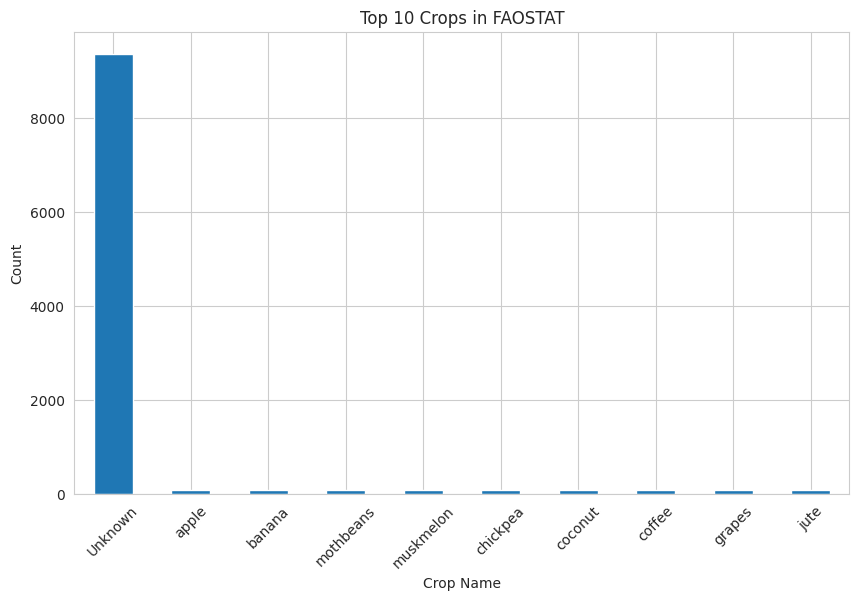

In [920]:
import matplotlib.pyplot as plt

# Count crops and show top 10
top_crops = fao['Crop'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_crops.plot(kind='bar')
plt.title("Top 10 Crops in FAOSTAT")
plt.xlabel("Crop Name")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

**Step 4: Production Over Years (Line Chart)**

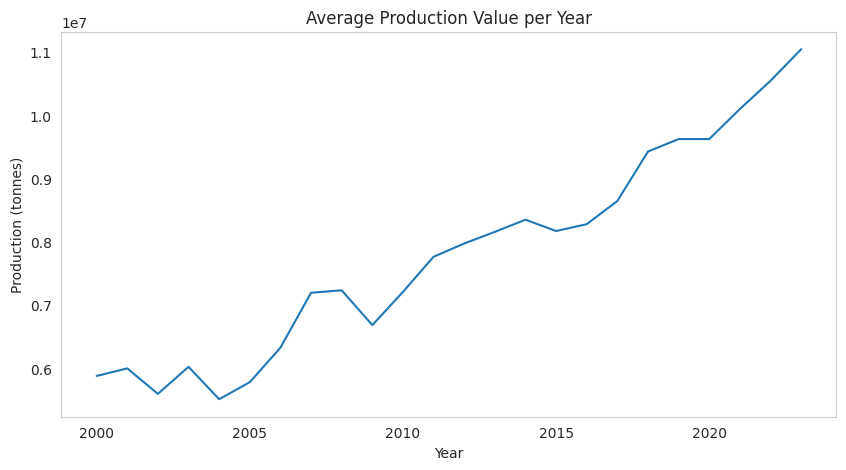

In [921]:
# Filter only Production rows
production_df = fao[fao['Element'] == 'Production']

# Group by Year and calculate average production
yearly_production = production_df.groupby('Year')['Value'].mean()

plt.figure(figsize=(10,5))
yearly_production.plot(kind='line')
plt.title("Average Production Value per Year")
plt.xlabel("Year")
plt.ylabel("Production (tonnes)")
plt.grid()
plt.show()


**Step 5: Correlation Heatmap (Crop Recommendation Dataset)**

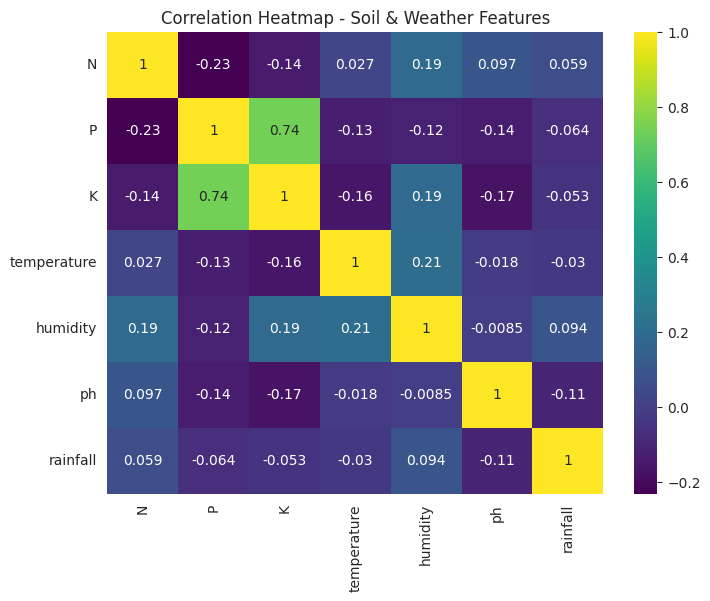

In [922]:
import seaborn as sns

plt.figure(figsize=(8,6))
# Exclude non-numeric columns (like 'crop') when calculating correlation
sns.heatmap(crop.drop(columns=['Crop']).corr(), annot=True, cmap="viridis")
plt.title("Correlation Heatmap - Soil & Weather Features")
plt.show()

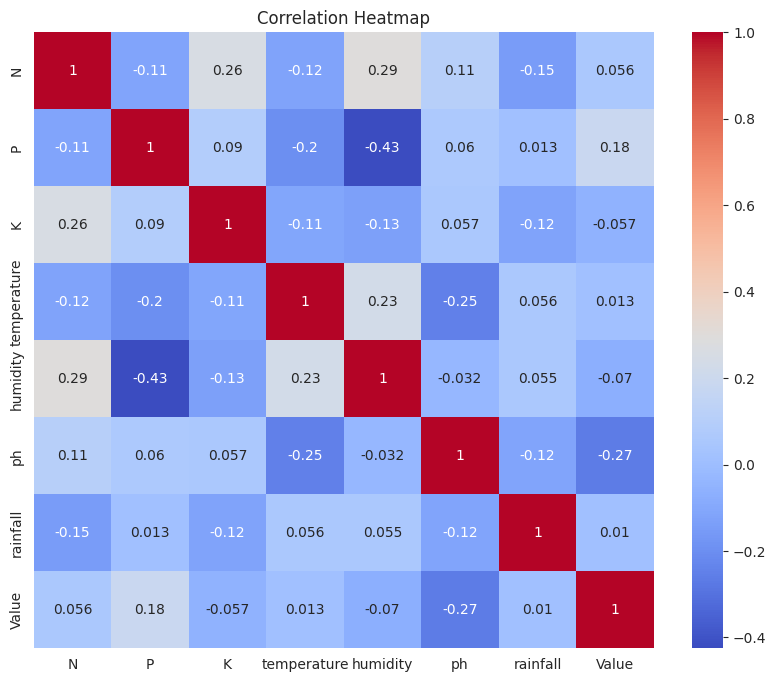

In [923]:
plt.figure(figsize=(10,8))
sns.heatmap(final_clean[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**Step 6: Boxplot to Detect Outliers**

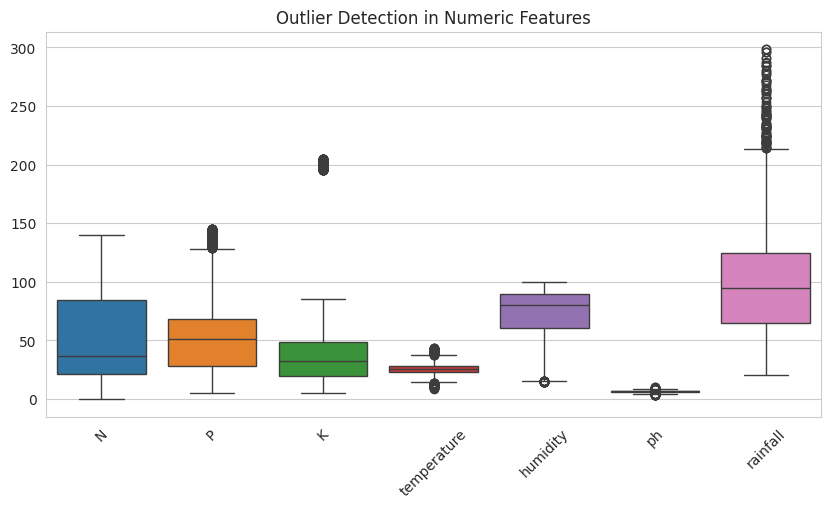

In [924]:
plt.figure(figsize=(10,5))
sns.boxplot(data=crop.select_dtypes(include=['float64','int64']))
plt.title("Outlier Detection in Numeric Features")
plt.xticks(rotation=45)
plt.show()


**Histograms for Numeric Features**

In [925]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric features
num_cols_fao = fao.select_dtypes(include=['int64', 'float64']).columns
num_cols_crop = crop.select_dtypes(include=['int64', 'float64']).columns

print("FAOSTAT Numeric Columns:", list(num_cols_fao))
print("\nCrop Dataset Numeric Columns:", list(num_cols_crop))


FAOSTAT Numeric Columns: ['Area Code (M49)', 'Element Code', 'Item Code (CPC)', 'Year Code', 'Year', 'Value']

Crop Dataset Numeric Columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


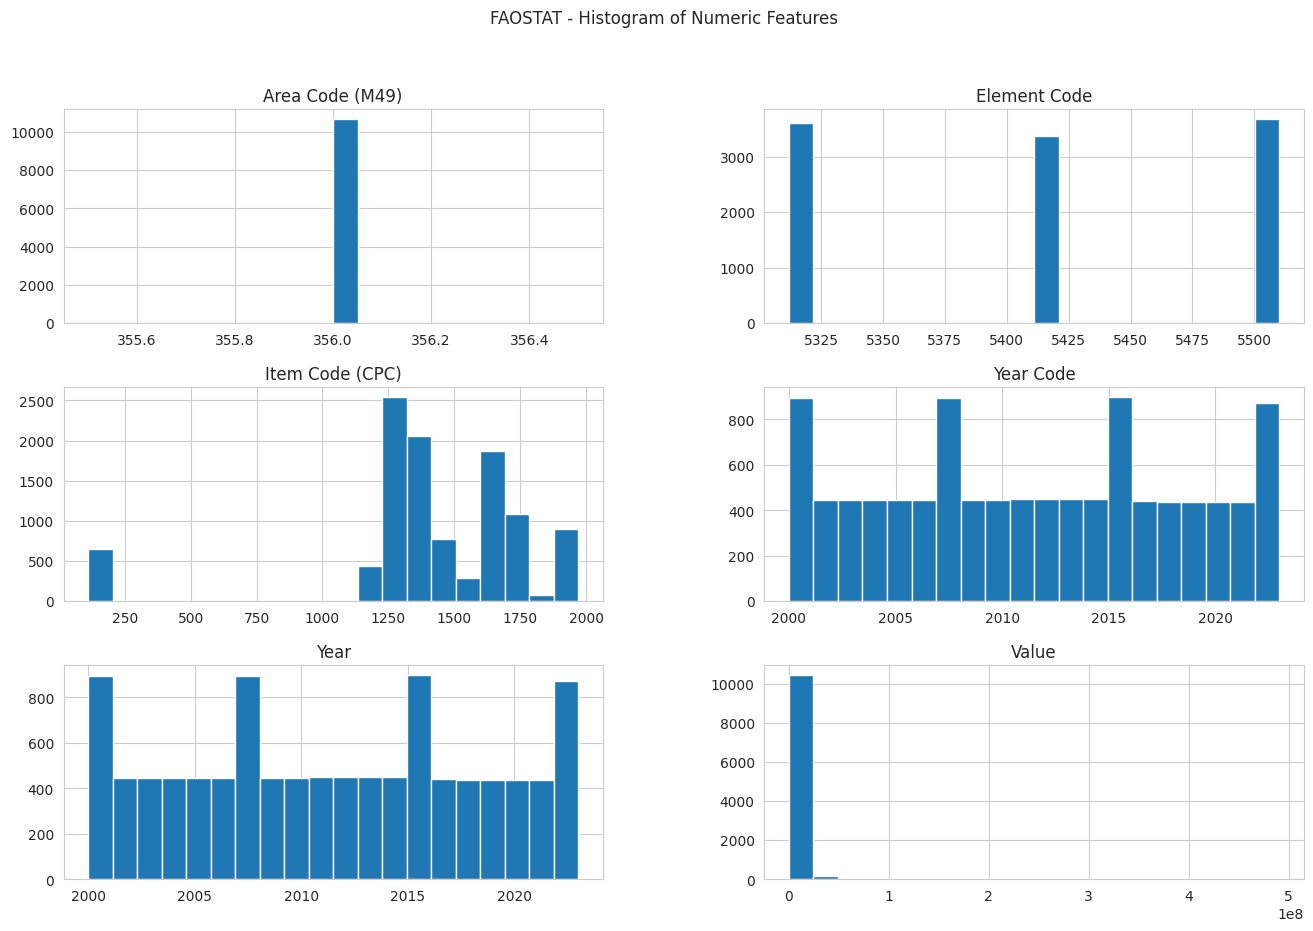

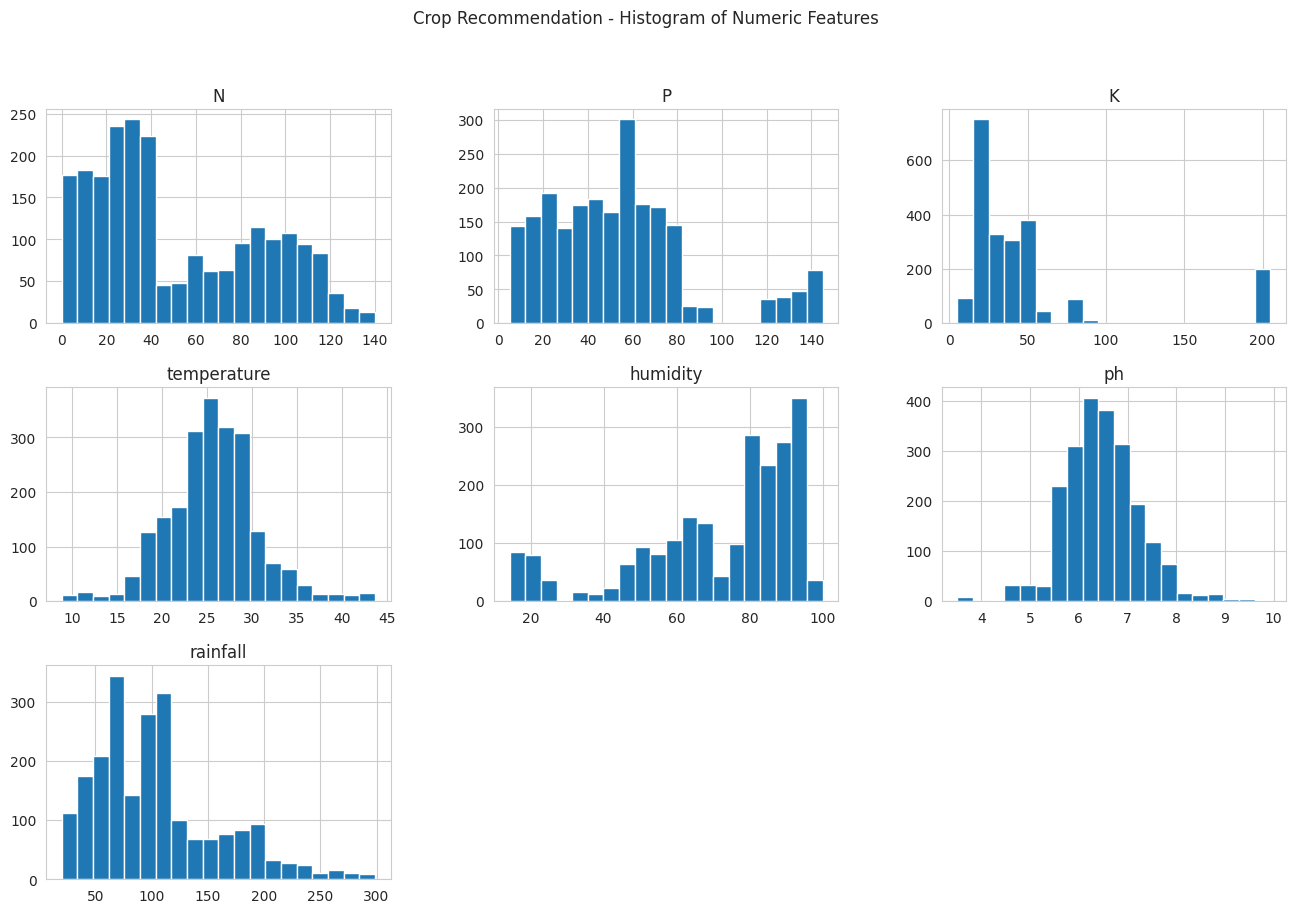

In [926]:
# Plot histograms for FAOSTAT
fao[num_cols_fao].hist(figsize=(16, 10), bins=20)
plt.suptitle("FAOSTAT - Histogram of Numeric Features")
plt.show()

# Plot histograms for Crop Recommendation dataset
crop[num_cols_crop].hist(figsize=(16, 10), bins=20)
plt.suptitle("Crop Recommendation - Histogram of Numeric Features")
plt.show()


**Boxplots for Outlier Detection**

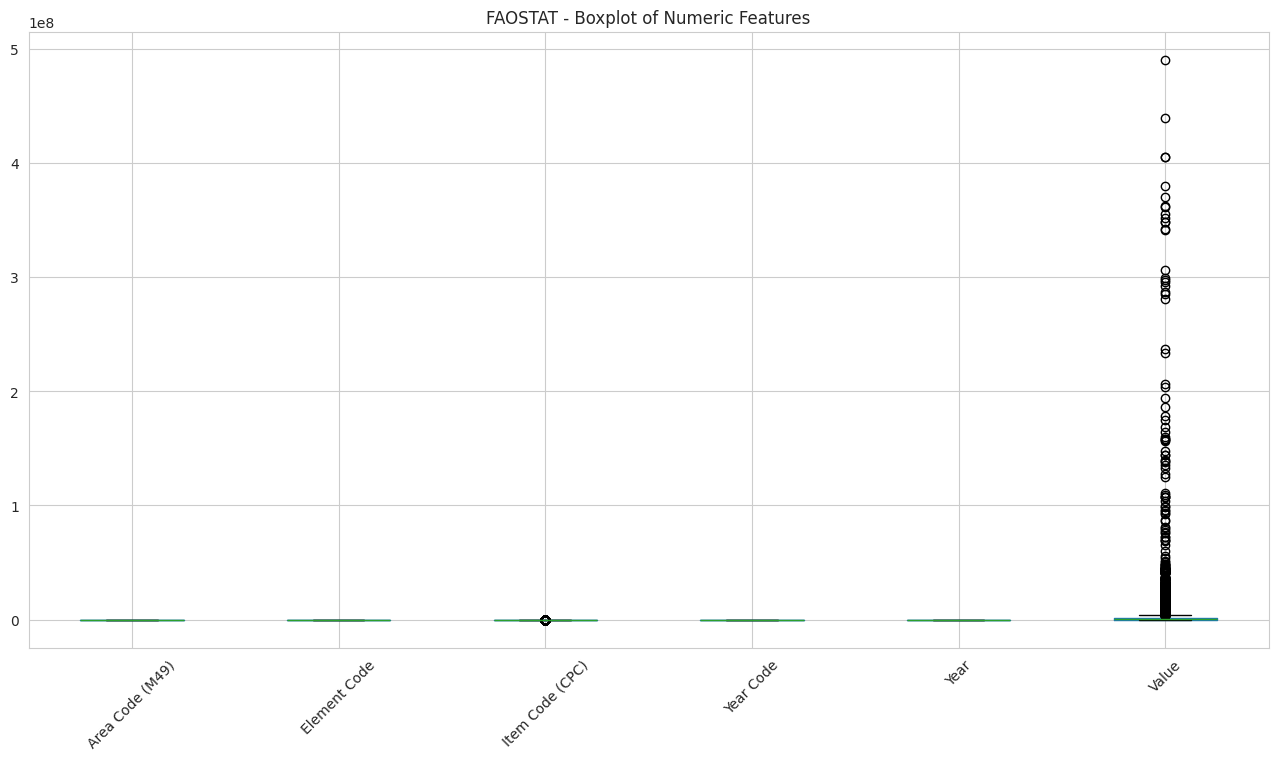

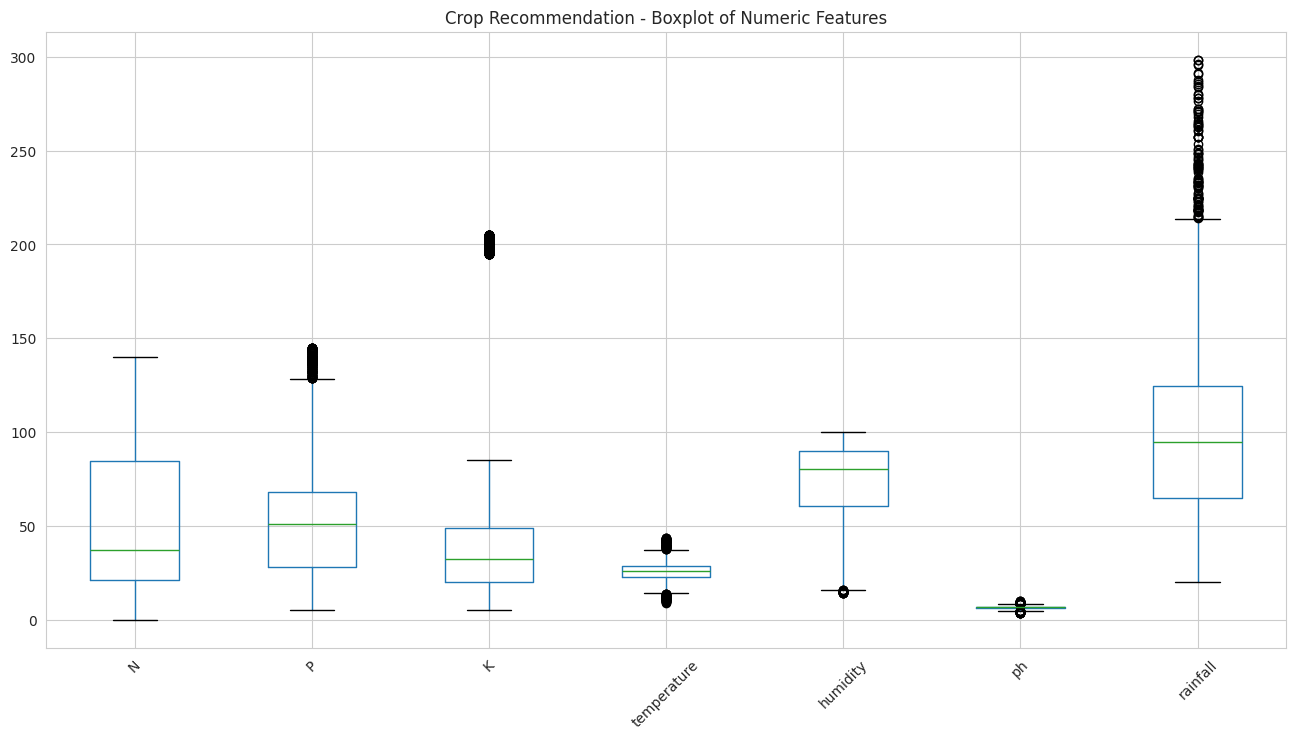

In [927]:
# Boxplots for FAOSTAT numeric features
plt.figure(figsize=(16, 8))
fao[num_cols_fao].boxplot()
plt.title("FAOSTAT - Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.show()

# Boxplots for Crop Recommendation dataset
plt.figure(figsize=(16, 8))
crop[num_cols_crop].boxplot()
plt.title("Crop Recommendation - Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.show()


--- Outlier Analysis ---
Visualizing Data Distribution BEFORE Removal...


/tmp/ipython-input-1524394856.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_clean[col] = pd.to_numeric(final_clean[col], errors='coerce')


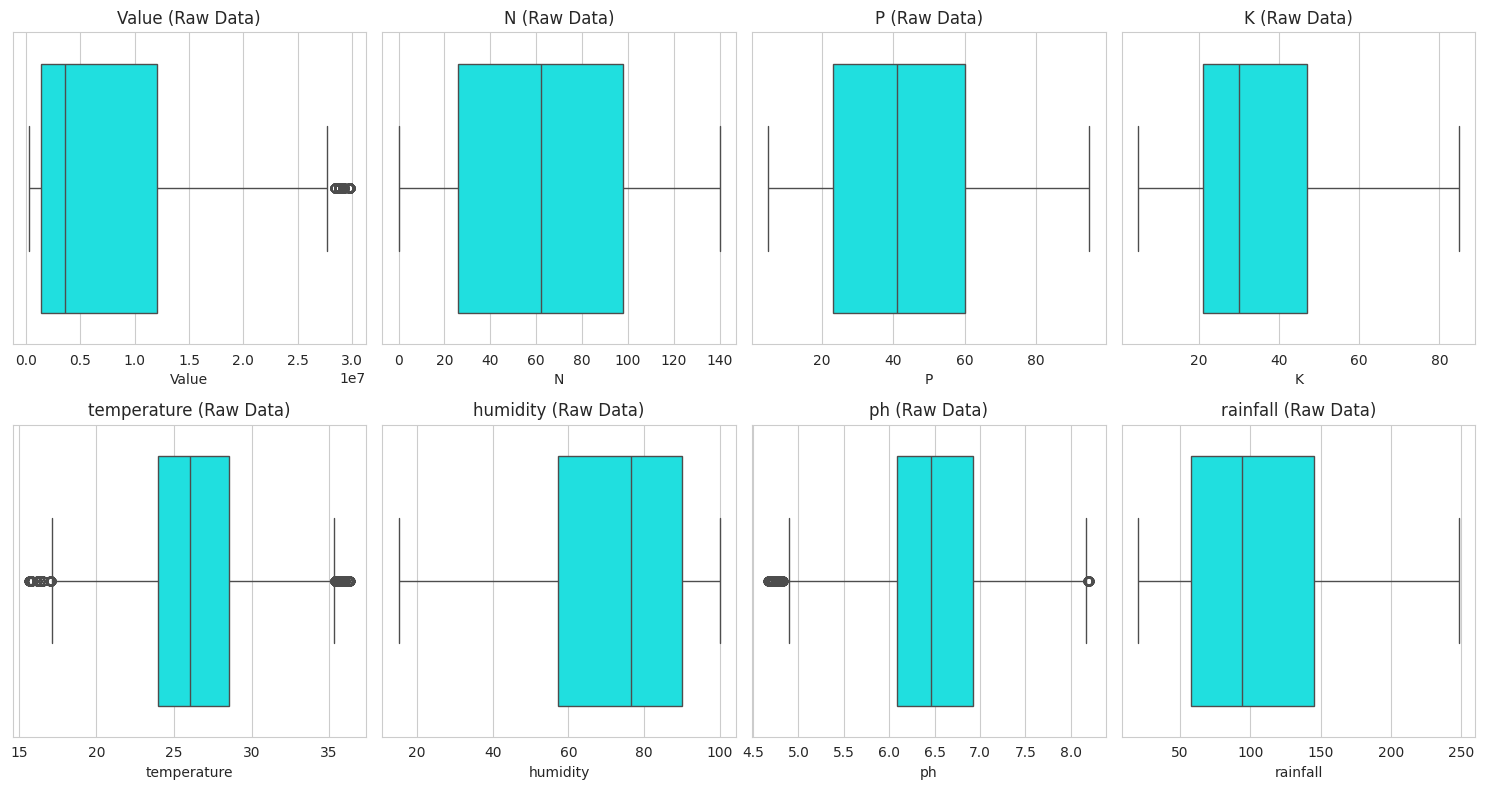

In [928]:
try:
    print("--- Outlier Analysis ---")
    print("Visualizing Data Distribution BEFORE Removal...")

    # Define columns to check
    numeric_cols = ['Value', 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

    # Ensure numeric
    for col in numeric_cols:
        final_clean[col] = pd.to_numeric(final_clean[col], errors='coerce')

    # Drop rows with missing values in these columns
    final_clean = final_clean.dropna(subset=numeric_cols)

    # Plot
    plt.figure(figsize=(15, 8))
    for i, col in enumerate(numeric_cols):
        plt.subplot(2, 4, i + 1)
        sns.boxplot(x=final_df[col], color='aqua')
        plt.title(f'{col} (Raw Data)')
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error: {e}")


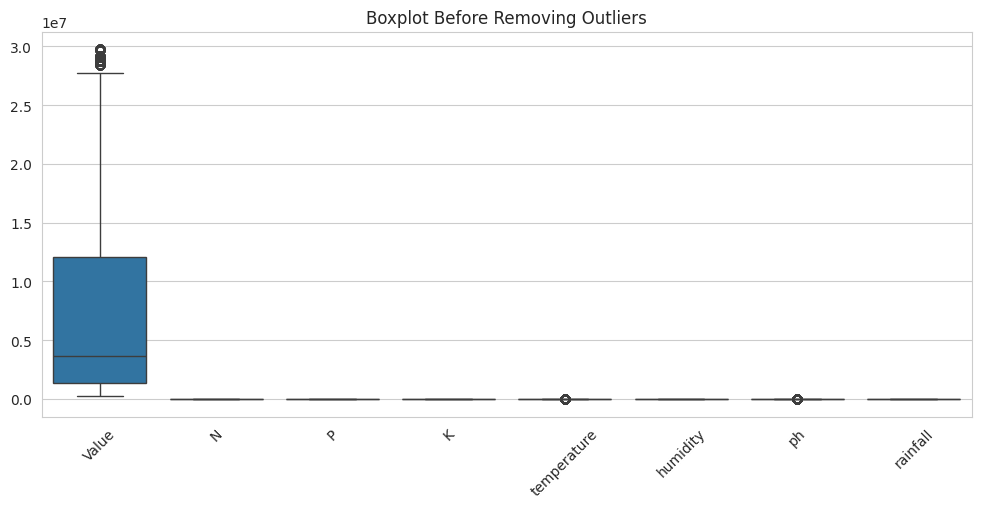

In [929]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=final_clean[numeric_cols])
plt.title("Boxplot Before Removing Outliers")
plt.xticks(rotation=45)
plt.show()

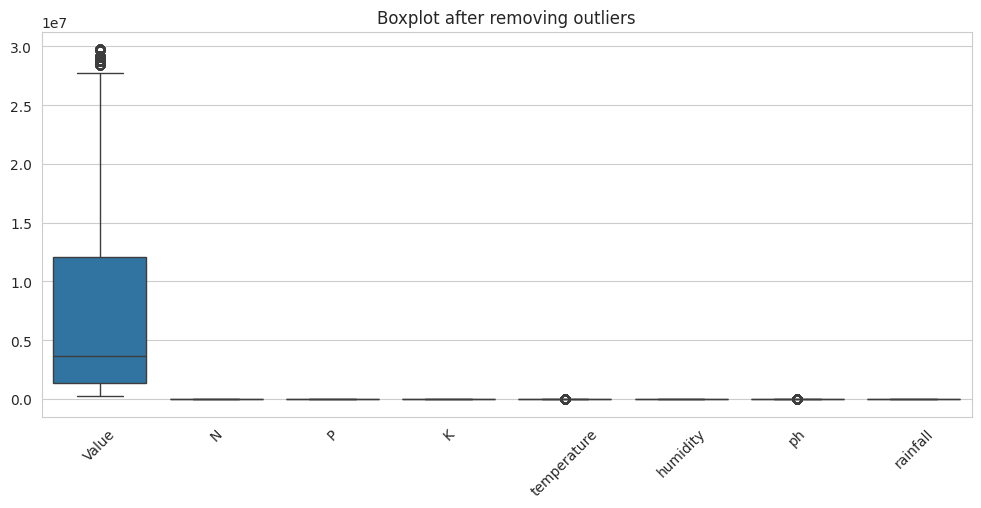

In [930]:
plt.figure(figsize=(12,5))
sns.boxplot(data=final_clean[numeric_cols])
plt.title("Boxplot after removing outliers")
plt.xticks(rotation=45)
plt.show()

Average Crop Production


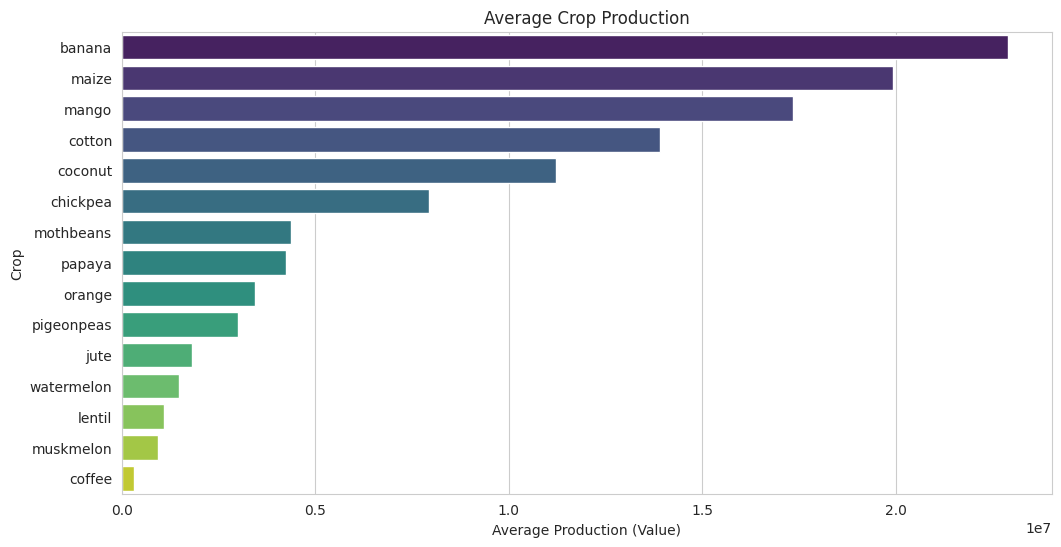

In [931]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define avg_vals (assuming it should be calculated from final_clean)
avg_vals = final_clean.groupby('Crop')['Value'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, max(6, len(avg_vals) * 0.4)))
sns.barplot(y=avg_vals.index, x=avg_vals.values, hue=avg_vals.index, palette='viridis', legend=False)
plt.xlabel('Average Production (Value)')
plt.ylabel('Crop')
plt.title('Average Crop Production')
plt.show()

In [932]:
len(final_clean)

30881

# **Milestone 2: Week 3 & 4 - EDA & Feature Engineering**

### **Performing Exploratory Data Analysis (EDA)**

--- Performing Exploratory Data Analysis (EDA) on df_final_agri_encoded ---


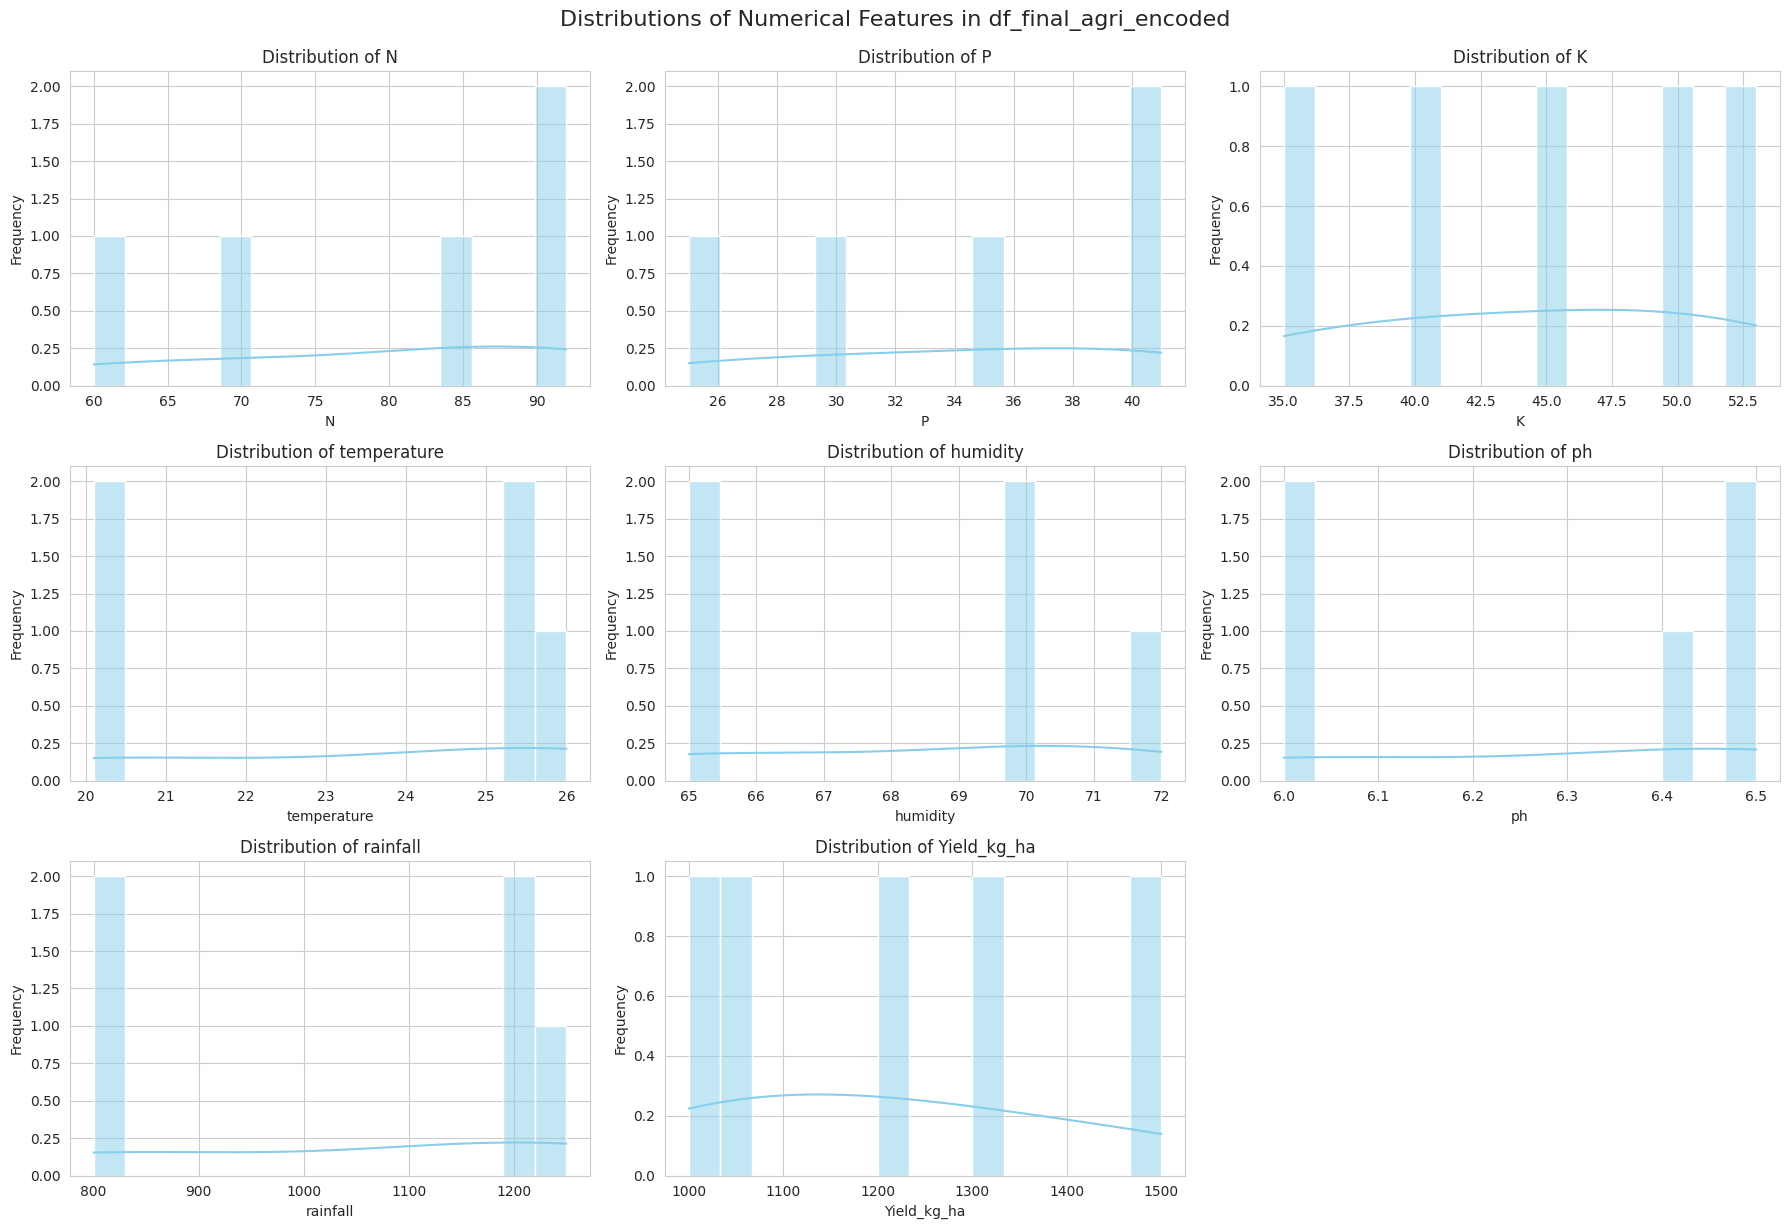

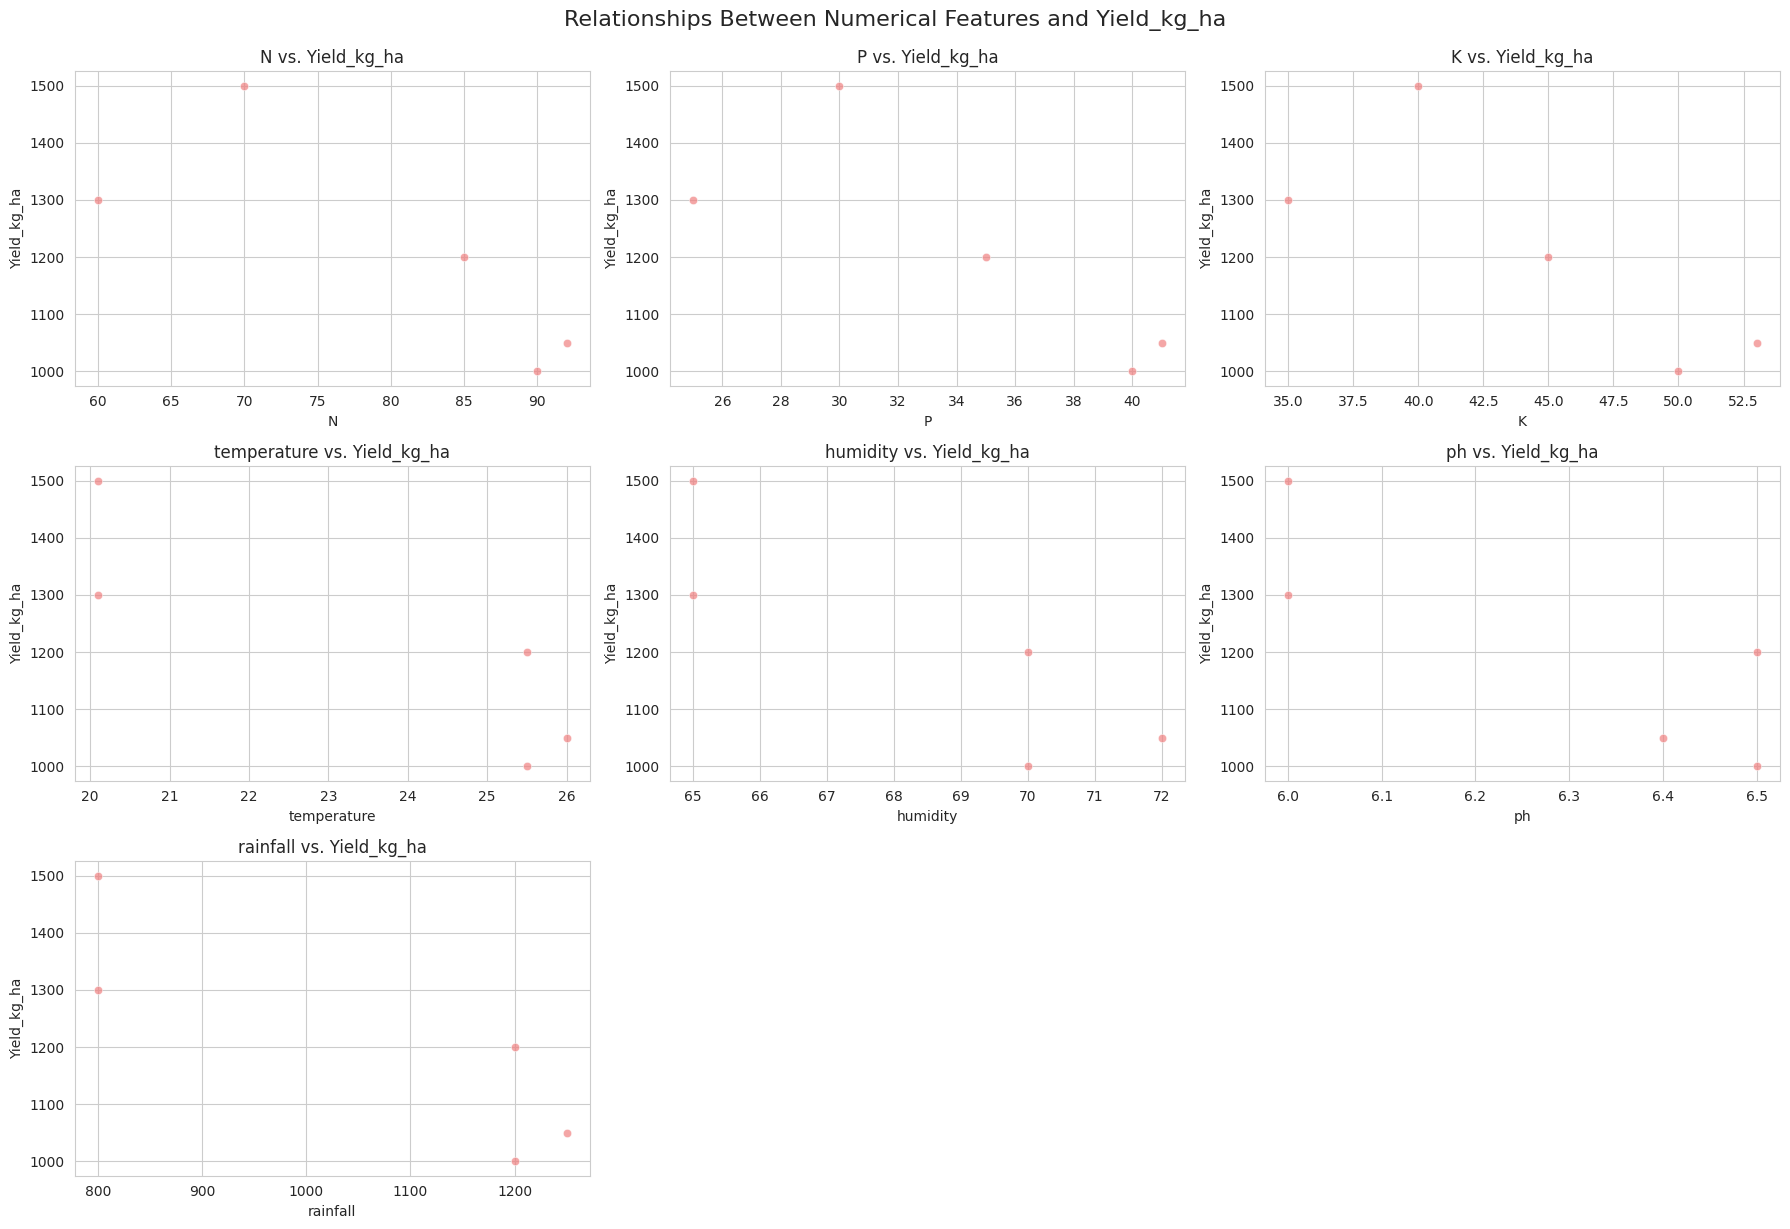


Correlation Matrix of Numerical Features (df_final_agri_encoded):


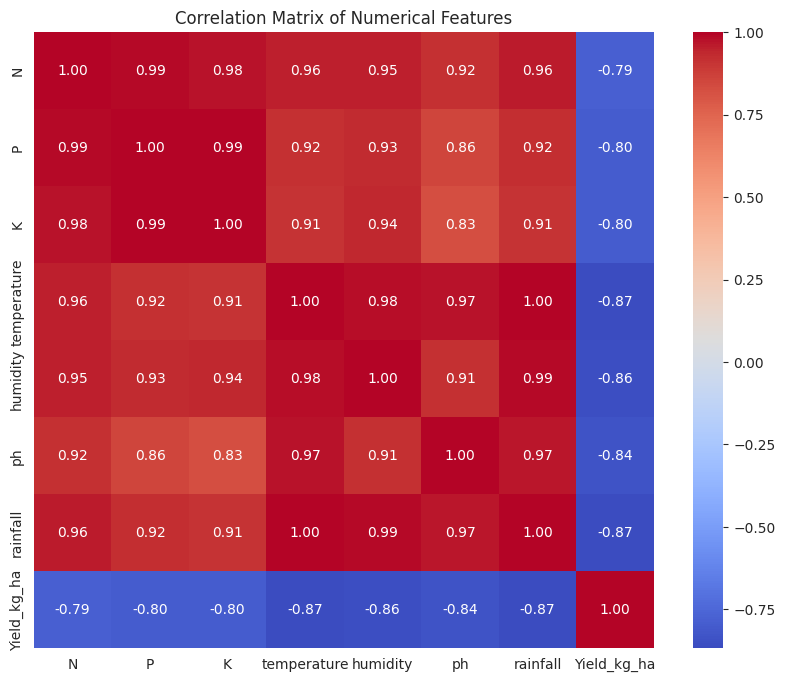


EDA Complete. Visualizations and Correlation Matrix generated.


In [933]:
print('--- Performing Exploratory Data Analysis (EDA) on df_final_agri_encoded ---')

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'df_final_agri' is defined from previous steps. If not, this will still error.
# Apply one-hot encoding to 'Country' and 'crop' columns in df_final_agri
df_final_agri_encoded = pd.get_dummies(df_final_agri, columns=['Country', 'crop'], drop_first=True)

# Set style for plots
sns.set_style("whitegrid")

# Define numerical features again for clarity, including the target variable
# Exclude Year for correlation analysis if it's treated as a categorical or just for grouping
numerical_features_for_eda = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'Yield_kg_ha']

# Plotting distributions of numerical features
plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_features_for_eda):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_final_agri_encoded[col], kde=True, bins=15, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.suptitle('Distributions of Numerical Features in df_final_agri_encoded', y=1.02, fontsize=16)
plt.show()

# Plotting relationships between numerical features and 'Yield_kg_ha'
plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_features_for_eda[:-1]): # Exclude 'Yield_kg_ha' from independent variables
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=df_final_agri_encoded[col], y=df_final_agri_encoded['Yield_kg_ha'], color='lightcoral', alpha=0.7)
    plt.title(f'{col} vs. Yield_kg_ha')
    plt.xlabel(col)
    plt.ylabel('Yield_kg_ha')
plt.tight_layout()
plt.suptitle('Relationships Between Numerical Features and Yield_kg_ha', y=1.02, fontsize=16)
plt.show()

print('\nCorrelation Matrix of Numerical Features (df_final_agri_encoded):')
# Calculate and display the correlation matrix for numerical features only
corr_matrix_final = df_final_agri_encoded[numerical_features_for_eda].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_final, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

print('\nEDA Complete. Visualizations and Correlation Matrix generated.')

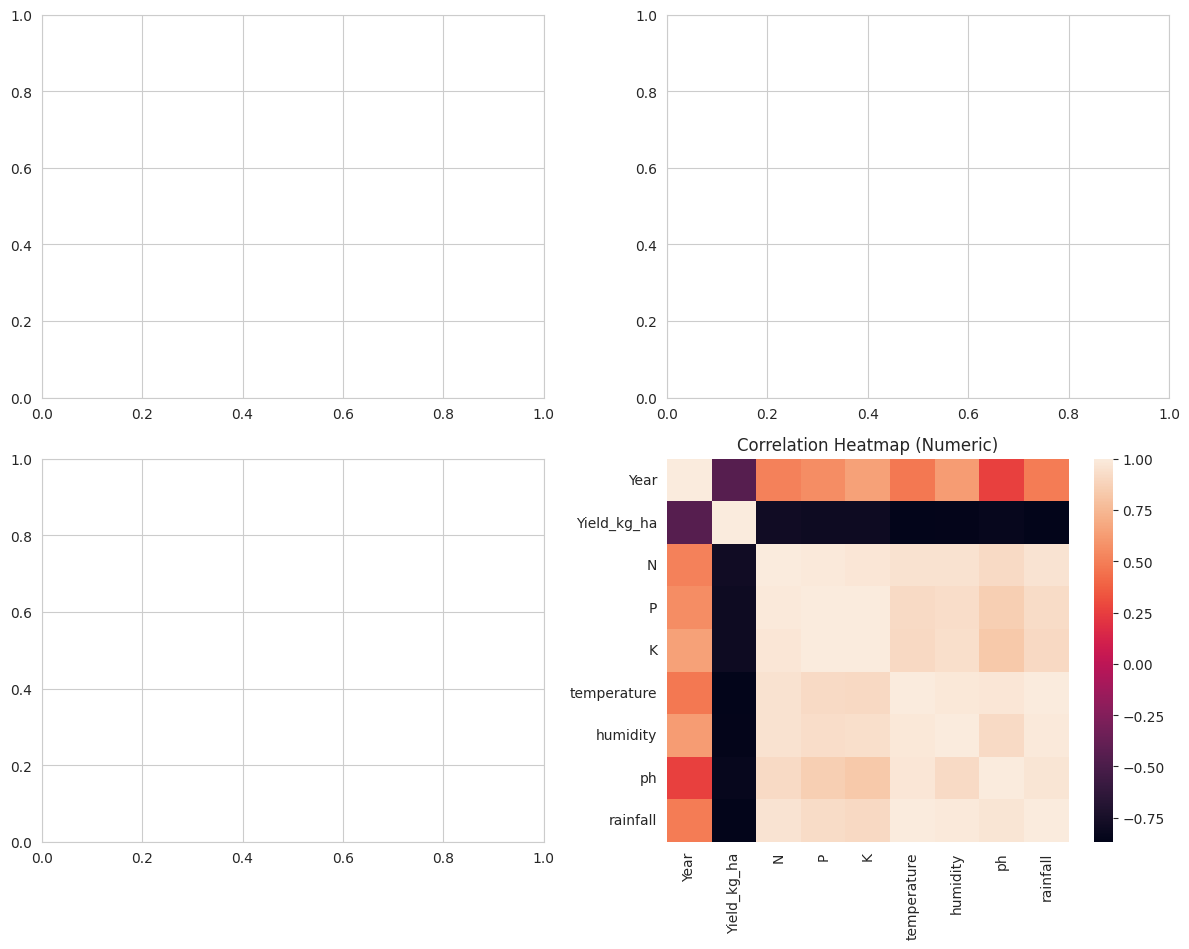

In [934]:
import seaborn as sns
import matplotlib.pyplot as plt

# 4) Correlation heatmap (numeric columns)
# Initialize a figure and a 2x2 grid of subplots (assuming this is part of a larger plot setup)
fig, axes = plt.subplots(2, 2, figsize=(12, 10)) # Added this line

numeric_df = df_final_agri.select_dtypes(include=['int64', 'float64'])
if numeric_df.shape[1] > 1:
    sns.heatmap(numeric_df.corr(), ax=axes[1, 1], annot=False)
    axes[1, 1].set_title("Correlation Heatmap (Numeric)")
else:
    axes[1, 1].text(0.5, 0.5, "Not enough numeric columns", ha='center')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for title
plt.show()

In [935]:
print("Crops Included:", final_clean['Crop'].unique())
print()
print("Total No. of Crops Included:", len(final_clean['Crop'].unique()))

Crops Included: ['maize' 'chickpea' 'pigeonpeas' 'mothbeans' 'lentil' 'banana' 'mango'
 'watermelon' 'muskmelon' 'orange' 'papaya' 'coconut' 'cotton' 'jute'
 'coffee']

Total No. of Crops Included: 15


In [936]:
# Shape of the dataset
print("Dataset Shape:", final_clean.shape)

# Column names & data types
final_clean.info()

Dataset Shape: (30881, 9)
<class 'pandas.core.frame.DataFrame'>
Index: 30881 entries, 2400 to 42599
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            30881 non-null  int64  
 1   P            30881 non-null  int64  
 2   K            30881 non-null  int64  
 3   temperature  30881 non-null  float64
 4   humidity     30881 non-null  float64
 5   ph           30881 non-null  float64
 6   rainfall     30881 non-null  float64
 7   Crop         30881 non-null  object 
 8   Value        30881 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 2.4+ MB


In [937]:
# Summary statistics for numeric features
final_clean.describe()


N             P             K   temperature      humidity  \
count  30881.000000  30881.000000  30881.000000  30881.000000  30881.000000   
mean      61.186620     42.488456     34.150287     26.056511     71.058399   
std       39.346725     22.606106     17.118841      3.916020     20.765110   
min        0.000000      5.000000      5.000000     15.632110     15.112796   
25%       26.000000     23.000000     21.000000     23.964360     57.173770   
50%       62.000000     41.000000     30.000000     26.030270     76.440486   
75%       98.000000     60.000000     47.000000     28.523967     90.105225   
max      140.000000     95.000000     85.000000     36.322681     99.981876   

                 ph      rainfall         Value  
count  30881.000000  30881.000000  3.088100e+04  
mean       6.497068    102.592353  7.422536e+06  
std        0.682353     53.585672  7.910445e+06  
min        4.669108     20.211267  2.550000e+05  
25%        6.088064     57.449421  1.368000e+06  
50%        6.458715     94.112133  3.626000e+06  
75%        6.925412    145.105065  1.204320e+07  
max        8.204862    248.859299  2.978000e+07

In [938]:
final_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30881 entries, 2400 to 42599
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            30881 non-null  int64  
 1   P            30881 non-null  int64  
 2   K            30881 non-null  int64  
 3   temperature  30881 non-null  float64
 4   humidity     30881 non-null  float64
 5   ph           30881 non-null  float64
 6   rainfall     30881 non-null  float64
 7   Crop         30881 non-null  object 
 8   Value        30881 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 2.4+ MB


In [939]:
# Missing values count
final_clean.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
Crop           0
Value          0
dtype: int64

# **Training Data**

**STEP 1: Define Target (y) and Features (X)**

In [940]:
y = final_df['Value']

In [941]:
X = final_df.drop(columns=['Value', 'Element'], errors='ignore')

In [942]:

print("Target & Features separated successfully")
print("X shape:", X.shape)
print("y shape:", y.shape)

Target & Features separated successfully
X shape: (30881, 8)
y shape: (30881,)


**STEP 2: Capture Numeric Input Ranges (For UI / Demo)**

In [943]:
numeric_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

In [944]:
input_ranges = {}

for col in numeric_cols:
    if col in final_df.columns:
        input_ranges[col] = (final_df[col].min(), final_df[col].max())

print("Input ranges captured:")
input_ranges

Input ranges captured:


{'N': (0, 140),
 'P': (5, 95),
 'K': (5, 85),
 'temperature': (15.63211033, 36.32268069),
 'humidity': (15.11279612, 99.98187601),
 'ph': (4.66910839, 8.204862075),
 'rainfall': (20.21126747, 248.8592986)}

**STEP 3: One-Hot Encoding (Crop Labels)**

In [945]:
if 'label' in X.columns:
    X = pd.get_dummies(X, columns=['label'], drop_first=True)

print("One-Hot Encoding completed")
print("Updated X shape:", X.shape)

One-Hot Encoding completed
Updated X shape: (30881, 8)


**STEP 4: Save Input Ranges (For Prediction Tool)**

In [946]:
import os
import joblib

# Create folder if it doesn't exist
os.makedirs("Datasets", exist_ok=True)

# Save the file
joblib.dump(input_ranges, "Datasets/input_ranges.joblib")

print("✅ Input ranges saved successfully")


✅ Input ranges saved successfully


In [947]:
joblib.dump(input_ranges, "input_ranges.joblib")


['input_ranges.joblib']

**STEP 5: Final Feature Check**

In [948]:
print("Final Feature List:")
for col in X.columns:
    print(col)


Final Feature List:
N
P
K
temperature
humidity
ph
rainfall
Crop


**STEP 6: Train–Test Split**

In [949]:
X_train, X_test, y_train, y_test

(    N   P   K  temperature  humidity   ph  rainfall
 4  92  41  53         26.0        72  6.4      1250
 2  70  30  40         20.1        65  6.0       800
 0  90  40  50         25.5        70  6.5      1200
 3  60  25  35         20.1        65  6.0       800,
     N   P   K  temperature  humidity   ph  rainfall
 1  85  35  45         25.5        70  6.5      1200,
 4    1050
 2    1500
 0    1000
 3    1300
 Name: Yield_kg_ha, dtype: int64,
 1    1200
 Name: Yield_kg_ha, dtype: int64)

### Preparing Features (X) and Target (y) for Model Training

In [950]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming df_final_agri has 'Crops_LabelEncoded' and 'Yield_kg_ha' columns
# Define target variable
y = df_final_agri['Yield_kg_ha']

# Define features (X)
# Drop the original 'crop' string column, 'Country' (string), 'Year' (if not intended as a feature),
# and the target 'Yield_kg_ha' from X.
X = df_final_agri.drop(columns=['Yield_kg_ha', 'crop', 'Country', 'Year'])

# Ensure all columns in X are numeric. The 'Crops_LabelEncoded' will be used.

print("Features (X) columns:")
for col in X.columns:
    print(col)

print("\nFirst 5 rows of X:")
display(X.head())

print("\nFirst 5 rows of y:")
display(y.head())

Features (X) columns:
N
P
K
temperature
humidity
ph
rainfall

First 5 rows of X:


N   P   K  temperature  humidity   ph  rainfall
0  90  40  50         25.5        70  6.5      1200
1  85  35  45         25.5        70  6.5      1200
2  70  30  40         20.1        65  6.0       800
3  60  25  35         20.1        65  6.0       800
4  92  41  53         26.0        72  6.4      1250


First 5 rows of y:


0    1000
1    1200
2    1500
3    1300
4    1050
Name: Yield_kg_ha, dtype: int64

### Performing Train-Test Split

In [951]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print("\nFirst 5 rows of X_train:")
display(X_train.head())

X_train shape: (4, 7)
X_test shape: (1, 7)
y_train shape: (4,)
y_test shape: (1,)

First 5 rows of X_train:


N   P   K  temperature  humidity   ph  rainfall
4  92  41  53         26.0        72  6.4      1250
2  70  30  40         20.1        65  6.0       800
0  90  40  50         25.5        70  6.5      1200
3  60  25  35         20.1        65  6.0       800

**STEP 7: Save the Trained Model**

In [952]:
import os
import joblib

# Create models folder if not exists
os.makedirs("models", exist_ok=True)

# Save model
joblib.dump(rf_model, "models/crop_yield_model.joblib")

print("✅ Trained model saved successfully")


✅ Trained model saved successfully


# **Model Evaluation Function**

In [953]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_regression_model(model, X_train, X_test, y_train, y_test):
    """
    Train the given regression model and print evaluation metrics.
    This keeps code clean and reusable for many models.
    """
    # 1. Train the model on training data
    model.fit(X_train, y_train)

    # 2. Predict on test data
    y_pred = model.predict(X_test)

    # 3. Calculate regression metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # 4. Print results in a clean format
    print(f"Model Name   : {model.__class__.__name__}")
    print(f"MAE          : {mae:.4f}")
    print(f"MSE          : {mse:.4f}")
    print(f"RMSE         : {rmse:.4f}")
    print(f"R² Score     : {r2:.4f}")
    print("-" * 50)

    # 5. Return metrics if you want to store later
    return {
        "model_name": model.__class__.__name__,
        "mae": mae,
        "mse": mse,
        "rmse": rmse,
        "r2": r2
    }


### **• Dummy Regressor**

In [954]:
from sklearn.dummy import DummyRegressor
def run_dummy_regressor_baseline(X_train, X_test, y_train, y_test):
    """
    Build a very simple baseline model using DummyRegressor.
    This will predict the mean of the target variable.
    """
    print("Running Dummy Regressor (Baseline)...")

    # Handle NaN values in y_train and y_test by imputing with the mean
    # This is necessary because scikit-learn models do not handle NaNs by default.
    y_train_cleaned = y_train.fillna(y_train.mean())
    y_test_cleaned = y_test.fillna(y_test.mean())

    # strategy="mean" -> always predict the mean of y_train
    dummy_model = DummyRegressor(strategy="mean")

    # Use the common evaluation function
    metrics = evaluate_regression_model(
        model=dummy_model,
        X_train=X_train,
        X_test=X_test,
        y_train=y_train_cleaned, # Use cleaned y_train
        y_test=y_test_cleaned    # Use cleaned y_test
    )

    return dummy_model, metrics

dummy_model, dummy_metrics = run_dummy_regressor_baseline(
    X_train, X_test, y_train, y_test
)


Running Dummy Regressor (Baseline)...
Model Name   : DummyRegressor
MAE          : 12.5000
MSE          : 156.2500
RMSE         : 12.5000
R² Score     : nan
--------------------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


### **• Linear Regression**

In [955]:
# Linear Regression  model
from sklearn.linear_model import LinearRegression

def run_linear_regression(X_train, X_test, y_train, y_test):
    """
    Build and evaluate a Linear Regression model.
    """
    print("Running Linear Regression Model...")

    # Handle NaN values in y_train and y_test by imputing with the mean
    # This is necessary because scikit-learn models do not handle NaNs by default.
    y_train_cleaned = y_train.fillna(y_train.mean())
    y_test_cleaned = y_test.fillna(y_test.mean())

    linear_model = LinearRegression()

    # Use the common evaluation function
    metrics = evaluate_regression_model(
        model=linear_model,
        X_train=X_train,
        X_test=X_test,
        y_train=y_train_cleaned, # Use cleaned y_train
        y_test=y_test_cleaned    # Use cleaned y_test
    )

    return linear_model, metrics

linear_model, linear_metrics = run_linear_regression(
    X_train, X_test, y_train, y_test
)

Running Linear Regression Model...
Model Name   : LinearRegression
MAE          : 402.2623
MSE          : 161814.9721
RMSE         : 402.2623
R² Score     : nan
--------------------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


# **Train Main Models**

### **• Random Forest Regressor**

In [956]:
from sklearn.ensemble import RandomForestRegressor

def run_random_forest_regressor(X_train, X_test, y_train, y_test):
    """
    Build and evaluate a Random Forest Regressor model.
    """
    print("Running Random Forest Regressor Model...")

    # Handle NaN values in y_train and y_test by imputing with the mean
    # This is necessary because scikit-learn models do not handle NaNs by default.
    y_train_cleaned = y_train.fillna(y_train.mean())
    y_test_cleaned = y_test.fillna(y_test.mean())

    # Initialize Random Forest Regressor with default parameters for now
    # Hyperparameter tuning can be done later.
    rf_model = RandomForestRegressor(random_state=42)

    # Use the common evaluation function
    metrics = evaluate_regression_model(
        model=rf_model,
        X_train=X_train,
        X_test=X_test,
        y_train=y_train_cleaned, # Use cleaned y_train
        y_test=y_test_cleaned    # Use cleaned y_test
    )

    return rf_model, metrics

random_forest_model, random_forest_metrics = run_random_forest_regressor(
    X_train, X_test, y_train, y_test
)

Running Random Forest Regressor Model...
Model Name   : RandomForestRegressor
MAE          : 77.5000
MSE          : 6006.2500
RMSE         : 77.5000
R² Score     : nan
--------------------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Top 10 Feature Importances for Random Forest Regressor:


Feature  Importance
1            P    0.205156
0            N    0.190350
2            K    0.158167
5           ph    0.151799
6     rainfall    0.130426
4     humidity    0.087529
3  temperature    0.076573

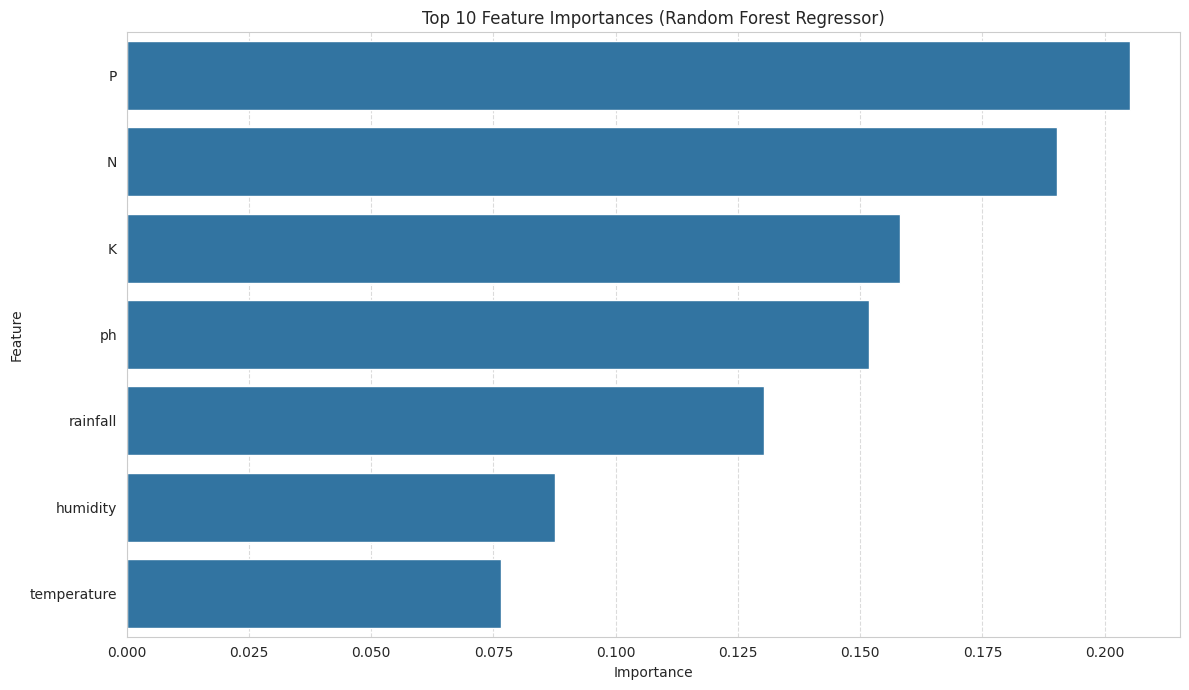

In [957]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained Random Forest model
feature_importances = random_forest_model.feature_importances_

# Get feature names from X_train (assuming X_train is a DataFrame)
feature_names = X_train.columns

# Create a DataFrame for better visualization and sorting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top N most important features (e.g., top 10)
num_features_to_display = 10
print(f"Top {num_features_to_display} Feature Importances for Random Forest Regressor:")
display(importance_df.head(num_features_to_display))

# Visualize feature importances
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(num_features_to_display))
plt.title(f'Top {num_features_to_display} Feature Importances (Random Forest Regressor)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### **• XGBoost Regressor**

In [958]:
!pip install xgboost

In [959]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_rmse_scores = -cross_val_score(
    xgb_model,
    X,
    y,
    cv=3,
    scoring="neg_root_mean_squared_error"
)

print("✅ XGBoost Results")
print("Average RMSE:", xgb_rmse_scores.mean())


✅ XGBoost Results
Average RMSE: 228.57769266764322


In [960]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

lr_model = LinearRegression()

lr_rmse_scores = -cross_val_score(
    lr_model,
    X,
    y,
    cv=3,
    scoring="neg_root_mean_squared_error"
)

print("Linear Regression RMSE:", lr_rmse_scores.mean())


Linear Regression RMSE: 409.6804053844021


# **Target Variable Distribution (Crop Yield)**

**Distribution Plot (Histogram + KDE)**

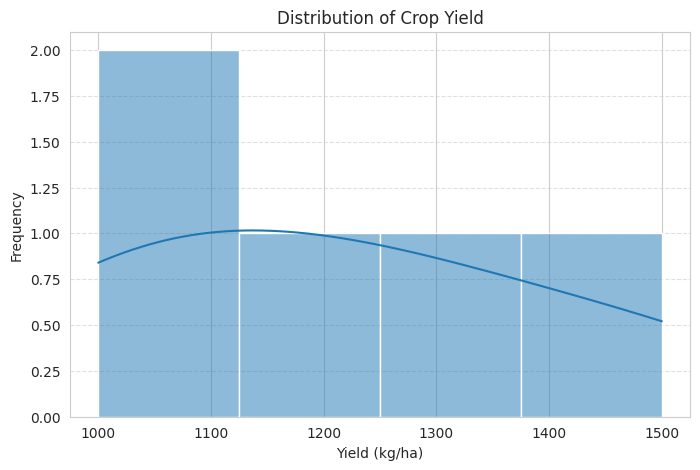

In [961]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# --- Define df_final_agri from merged_df (assuming merged_df is available) ---
# Select relevant columns for df_final_agri and rename for consistency
df_final_agri = merged_df[[
    'Area', 'crop', 'Year', 'Value', 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'
]].copy()

df_final_agri.rename(columns={'Area': 'Country', 'Value': 'Yield_kg_ha'}, inplace=True)

# --- Create df_final_agri_encoded (from df_final_agri) ---
# Apply one-hot encoding to 'Country' and 'crop' columns in df_final_agri
df_final_agri_encoded = pd.get_dummies(df_final_agri, columns=['Country', 'crop'], drop_first=True)

# Identify numerical columns for scaling
numerical_cols_to_scale = [
    'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'
]

# Initialize StandardScaler
scaler = StandardScaler()

# Apply standardization to the numerical columns
df_final_agri_encoded[numerical_cols_to_scale] = scaler.fit_transform(df_final_agri_encoded[numerical_cols_to_scale])
# --- End of creating df_final_agri_encoded ---

plt.figure(figsize=(8,5))
sns.histplot(df_final_agri_encoded['Yield_kg_ha'], kde=True)
plt.title("Distribution of Crop Yield")
plt.xlabel("Yield (kg/ha)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# **SVM MODELS**

In [962]:
# --- Imports ---
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error

# ---------- 1. Split features and target ----------
target_col = 'Value'   # change if your yield column is different
X_fao = fao.drop(columns=[target_col])
y_fao = fao[target_col]

# ---------- 2. Identify column types ----------
cat_cols_fao = X_fao.select_dtypes(include=['object']).columns.tolist()
num_cols_fao = X_fao.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("FAOSTAT - Categorical columns:", cat_cols_fao)
print("FAOSTAT - Numeric columns:", num_cols_fao)

# ---------- 3. Preprocessing (One-Hot + Scaling) ----------
preprocessor_fao = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols_fao),
        ('num', StandardScaler(), num_cols_fao)
    ]
)

# ---------- 4. Define SVR model ----------
# RBF kernel is common for non-linear problems
svr_model = SVR(
    kernel='rbf',
    C=10.0,
    epsilon=0.1
)

# ---------- 5. Build full pipeline ----------
fao_svr_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor_fao),
    ('model', svr_model)
])

# ---------- 6. Train-test split ----------
Xf_train, Xf_test, yf_train, yf_test = train_test_split(
    X_fao, y_fao, test_size=0.2, random_state=42
)

# Handle NaNs in yf_train and corresponding Xf_train before fitting
if yf_train.isnull().any():
    valid_indices_train = yf_train.dropna().index
    Xf_train_cleaned = Xf_train.loc[valid_indices_train]
    yf_train_cleaned = yf_train.loc[valid_indices_train]
    print(f"Removed {len(yf_train) - len(yf_train_cleaned)} NaN values from yf_train for training.")
else:
    Xf_train_cleaned = Xf_train
    yf_train_cleaned = yf_train

# ---------- 7. Fit model ----------
fao_svr_pipeline.fit(Xf_train_cleaned, yf_train_cleaned)

# Handle NaNs in yf_test and corresponding Xf_test before evaluation
if yf_test.isnull().any():
    valid_indices_test = yf_test.dropna().index
    Xf_test_cleaned = Xf_test.loc[valid_indices_test]
    yf_test_cleaned = yf_test.loc[valid_indices_test]
    print(f"Removed {len(yf_test) - len(yf_test_cleaned)} NaN values from yf_test for scoring.")
else:
    Xf_test_cleaned = Xf_test
    yf_test_cleaned = yf_test

# ---------- 8. Evaluate ----------
y_pred = fao_svr_pipeline.predict(Xf_test_cleaned)

r2 = r2_score(yf_test_cleaned, y_pred)
mae = mean_absolute_error(yf_test_cleaned, y_pred)

print(f"SVR Yield Prediction - R² Score : {r2:.3f}")
print(f"SVR Yield Prediction - MAE      : {mae:.3f}")

FAOSTAT - Categorical columns: ['Domain Code', 'Domain', 'Area', 'Element', 'Item', 'Unit', 'Flag', 'Flag Description', 'Note', 'Crop']
FAOSTAT - Numeric columns: ['Area Code (M49)', 'Element Code', 'Item Code (CPC)', 'Year Code', 'Year']
SVR Yield Prediction - R² Score : -0.030
SVR Yield Prediction - MAE      : 3708714.002


In [963]:
svr_linear = SVR(kernel='linear', C=1.0)
fao_svr_pipeline.set_params(model=svr_linear)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Domain Code', 'Domain',
                                                   'Area', 'Element', 'Item',
                                                   'Unit', 'Flag',
                                                   'Flag Description', 'Note',
                                                   'Crop']),
                                                 ('num', StandardScaler(),
                                                  ['Area Code (M49)',
                                                   'Element Code',
                                                   'Item Code (CPC)',
                                                   'Year Code', 'Year'])])),
                ('model', SVR(kernel='linear'))])